# **Project Name** : -  Credit Card Default Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member** - Mahima Lakra

# **Project Summary -**

**Data Preprocessing**

1 - Getting the dataset

2 - Importing all the essential libraries

3 - importing dataset

4 - Checking dataset to get an overview of what needs to be done

5 - Encoding categorical data

6 - Data cleaning and feature engineering

**Exploratory Data Analysis**

1 - Finding our target vaariable for analysis and checking its relationship with other dependent variable.

2 - checked number of values in categorical columns.

3 - replaced the values that are lowest in categorical columns.

4 - replaced some of the values in numerical columns.

5 - using encoding techniques on categorical features.

6 - checked for correlation among different features.

**Supervised machine learning models**

Logistic Regression

Decision Tree

Random Forest

XG Boost Classifier

Support Vector Classifier

# **GitHub Link -** **https://github.com/Mahima1akra/Credit-Card-default-predictions**

# **Problem Statement**

Whenever you accept a credit card, you agree to certain terms and conditions including making your minimum payment by the due date listed on your credit card statement.

When you miss the minimum payment by 6 months or more in a row, your credit card will be in default. In such situations, your credit card issuer will first send several notices via email or SMS and call you asking to make the payment. If you do not make the payment after a stipulated period, they will close your account and report the default to the credit bureaus.

This tends to impact your credit score and it will be difficult for you to get approved for loans in the future. Once you are listed as a credit card defaulter, you become a risk for any credit obligation.

This project is aimed at predicting the case of customer default payements in taiwan. The result of classification will be divided into binary category of **credible** and **not-credible** clients. The task is to predict the clients which will default on their credit card payements.

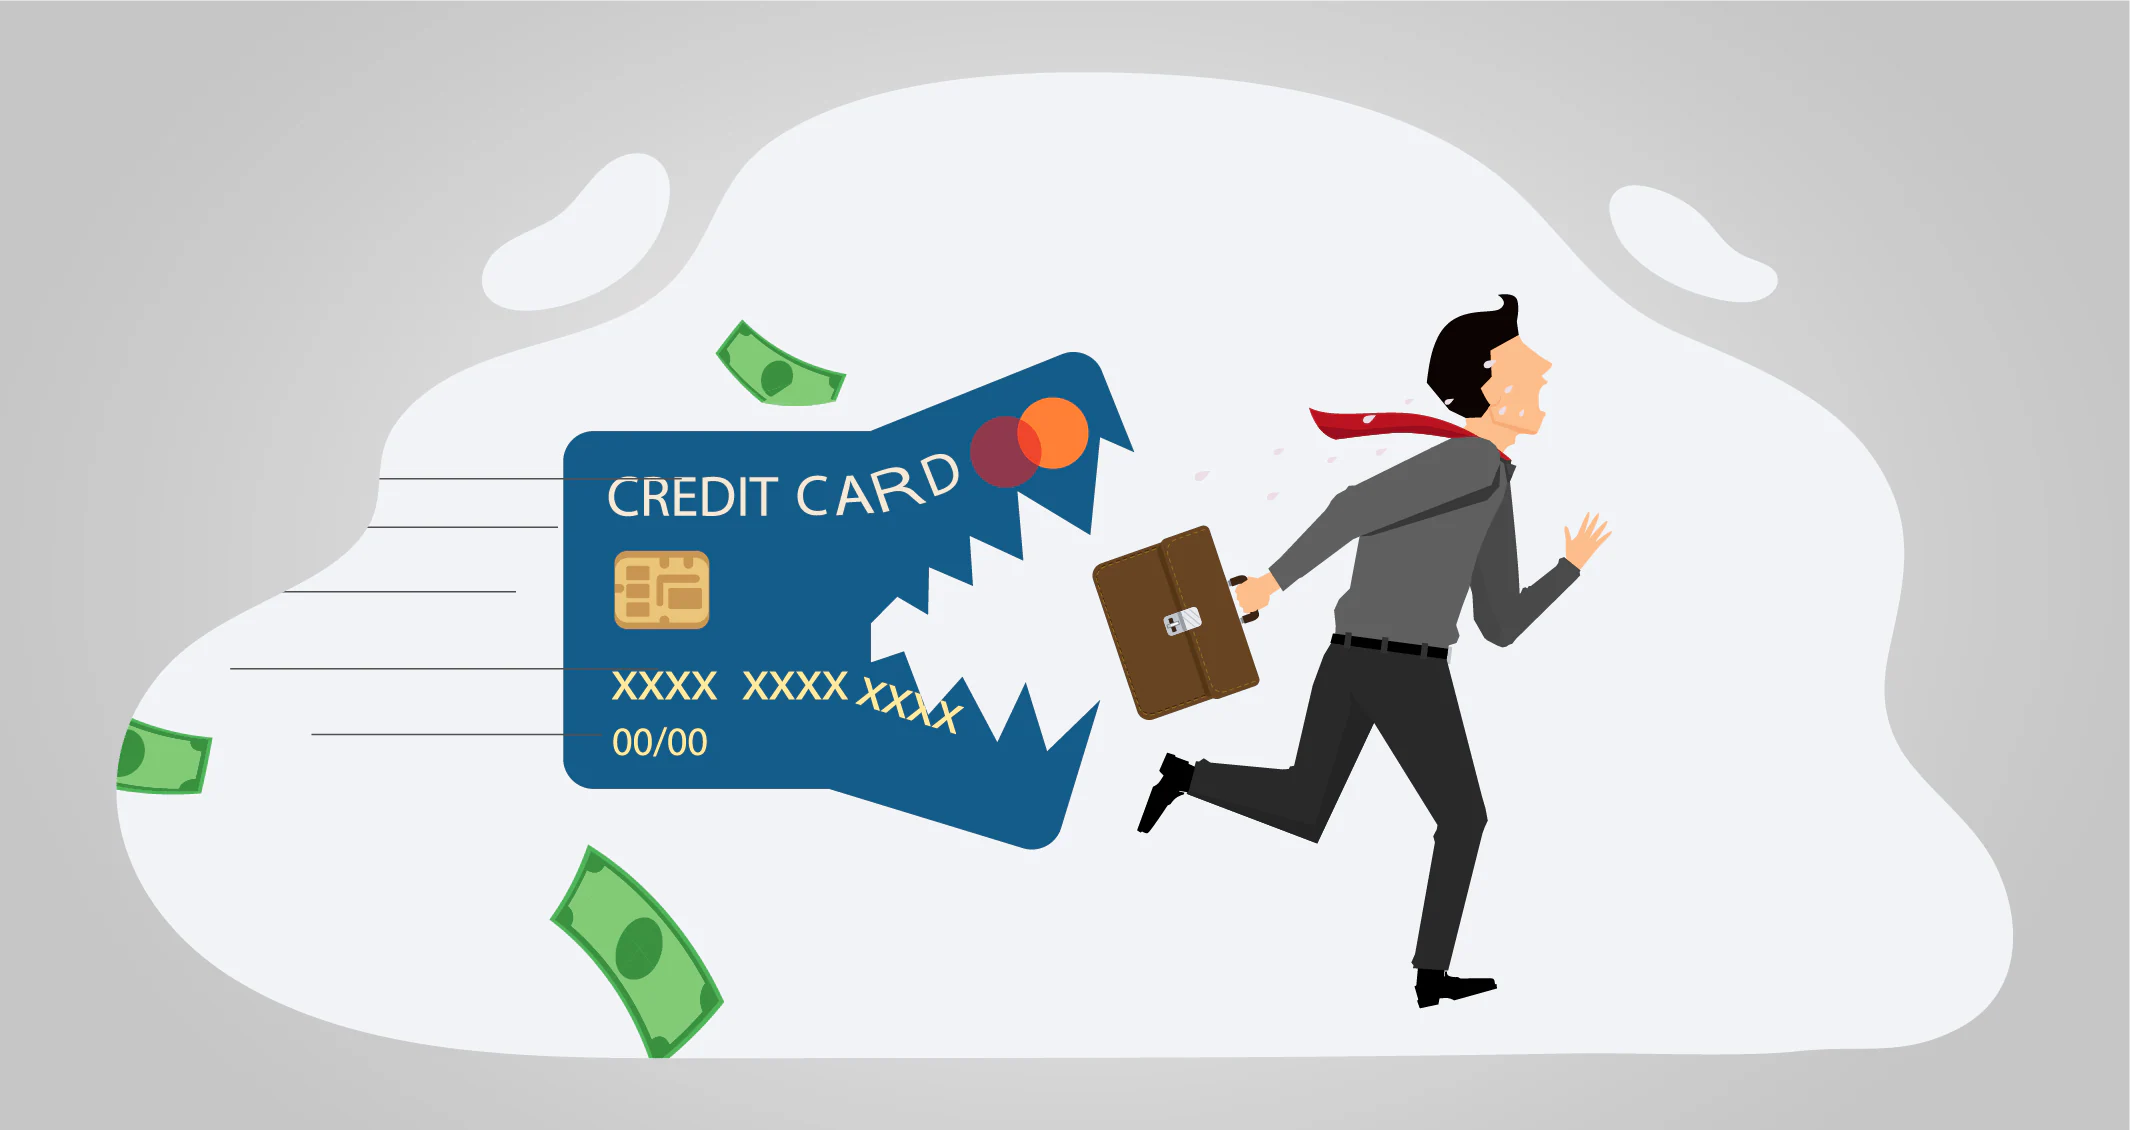

# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Cr_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Alma Better/Cohort Berlin/Capstone projects/Capstone project 3-Credit Card Defaults Predictions(Classification)/default of credit card clients.xlsx")

### Dataset First View

In [ ]:
# First look
Cr_df.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [ ]:
rename_list = ['ID','max_credit_given', 'gender', 'education', 'marital_status', 'age',
'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april',
'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
col_rename = dict(zip(Cr_df.columns, rename_list))
Cr_df = Cr_df.rename(columns = col_rename)

In [ ]:
Cr_df = Cr_df.drop(Cr_df.index[[0]], axis = 0)

In [ ]:
Cr_df.head(10)

,ID,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


### Dataset Rows & Columns count

In [ ]:
# Shape of the dataset
Cr_df.shape

(30000, 25)

### Dataset info

In [ ]:
Cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                30000 non-null  object
 1   max_credit_given  30000 non-null  object
 2   gender            30000 non-null  object
 3   education         30000 non-null  object
 4   marital_status    30000 non-null  object
 5   age               30000 non-null  object
 6   pay_status_sept   30000 non-null  object
 7   pay_status_aug    30000 non-null  object
 8   pay_status_july   30000 non-null  object
 9   pay_status_june   30000 non-null  object
 10  pay_status_may    30000 non-null  object
 11  pay_status_april  30000 non-null  object
 12  bill_sept         30000 non-null  object
 13  bill_aug          30000 non-null  object
 14  bill_july         30000 non-null  object
 15  bill_june         30000 non-null  object
 16  bill_may          30000 non-null  object
 17  bill_april  

### Duplicate Values

In [ ]:
print(f" There are {Cr_df.duplicated().sum()} duplicated values")

 There are 0 duplicated values


#### Missing Values/Null Values

In [ ]:
# Counting missing and null values
Cr_df.isna().sum().sort_values(ascending = False)

ID                  0
bill_aug            0
payment_april       0
payment_may         0
payment_jun         0
payment_jul         0
payment_aug         0
payment_sept        0
bill_april          0
bill_may            0
bill_june           0
bill_july           0
bill_sept           0
max_credit_given    0
pay_status_april    0
pay_status_may      0
pay_status_june     0
pay_status_july     0
pay_status_aug      0
pay_status_sept     0
age                 0
marital_status      0
education           0
gender              0
default             0
dtype: int64

<Axes: >

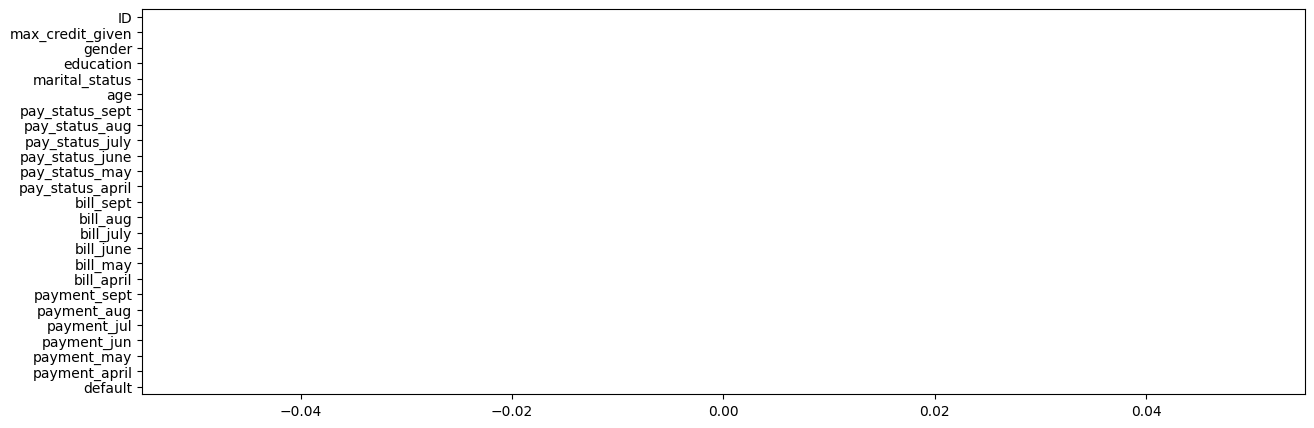

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (15,5))
sns.barplot(data = Cr_df.isnull(), orient = "h")

### What did you know about your dataset?

There are a total of 30000 rows and 25 columns, among which default is our target variable and rest of them are independent variables. Judging from the the results above it can be seen that there are no missing values or null values in the dataset and there were no duplicate values as well. Intially the names of the columns were not recognizable but in the second row they were mentioned clearly.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset columns
Cr_df.columns

Index(['ID', 'max_credit_given', 'gender', 'education', 'marital_status',
       'age', 'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default'],
      dtype='object')

In [ ]:
# Dataset Describe
Cr_df.describe(include = "all")

,ID,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Variables Description

Names of the variables along with their descriptions are as below:

* ID: ID of the customers.

* max_credit_given: maximum amount of credit given to the customer.

* gender: gender of the customer. Given in categorical format.

* education: maximum qualification recieved by the customer. Given in categorical format.

* marital_status: indicates the marital status of the customer.(Categorical)

* age: age of the customer.

* pay_status_april: payement status for the month for which the bill was generated and indicates the number of times customer delayed the payment.

* pay_status_may: payement status for the month for which the bill was generated and indicates the number of times customer delayed the payment.

* pay_status_june: payement status for the month for which the bill was generated and indicates the number of times customer delayed the payment.

* pay_status_july: payement status for the month for which the bill was generated and indicates the number of times customer delayed the payment.

* pay_status_aug: payement status for the month for which the bill was generated and indicates the number of times customer delayed the payment.

* pay_status_sept: payement status for the month for which the bill was generated and indicates the number of times customer delayed the payment.

* bill_april: bill for the particular month.

* bill_may: bill for the particular month.

* bill_june: bill for the particular month.

* bill_july: bill for the particular month.

* bill_aug: bill for the particular month.

* bill_sep: bill for the particular month.

* payement_april: bill payement for the particular month.

* payement_may: bill payement for the particular month.

* payement_junne: bill payement for the particular month.

* payement_july: bill payement for the particular month.

* payement_aug: bill payement for the particular month.

* payement_sep: bill payement for the particular month.

* default: indicates if the customer was a defaulter(1) or not(0).

### Check Unique Values for each variable.

In [ ]:
# checking for count of all unique variables
for i in Cr_df.columns.tolist():
  print('The number of unique items in', i, 'is', Cr_df[i].nunique())

The number of unique items in ID is 30000
The number of unique items in max_credit_given is 81
The number of unique items in gender is 2
The number of unique items in education is 7
The number of unique items in marital_status is 4
The number of unique items in age is 56
The number of unique items in pay_status_sept is 11
The number of unique items in pay_status_aug is 11
The number of unique items in pay_status_july is 11
The number of unique items in pay_status_june is 11
The number of unique items in pay_status_may is 10
The number of unique items in pay_status_april is 10
The number of unique items in bill_sept is 22723
The number of unique items in bill_aug is 22346
The number of unique items in bill_july is 22026
The number of unique items in bill_june is 21548
The number of unique items in bill_may is 21010
The number of unique items in bill_april is 20604
The number of unique items in payment_sept is 7943
The number of unique items in payment_aug is 7899
The number of unique it

In [ ]:
for i in Cr_df.columns.tolist():
  print('The number of unique values in', i, 'is', Cr_df[i].unique())

The number of unique values in ID is [1 2 3 ... 29998 29999 30000]
The number of unique values in max_credit_given is [20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]
The number of unique values in gender is [2 1]
The number of unique values in education is [2 1 3 5 4 6 0]
The number of unique values in marital_status is [1 2 3 0]
The number of unique values in age is [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 5

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# changing all values from objects to numeric
Cr_df = Cr_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Checking datatype
Cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                30000 non-null  int64
 1   max_credit_given  30000 non-null  int64
 2   gender            30000 non-null  int64
 3   education         30000 non-null  int64
 4   marital_status    30000 non-null  int64
 5   age               30000 non-null  int64
 6   pay_status_sept   30000 non-null  int64
 7   pay_status_aug    30000 non-null  int64
 8   pay_status_july   30000 non-null  int64
 9   pay_status_june   30000 non-null  int64
 10  pay_status_may    30000 non-null  int64
 11  pay_status_april  30000 non-null  int64
 12  bill_sept         30000 non-null  int64
 13  bill_aug          30000 non-null  int64
 14  bill_july         30000 non-null  int64
 15  bill_june         30000 non-null  int64
 16  bill_may          30000 non-null  int64
 17  bill_april        30000 non-nul

In [ ]:
# Checking stats for all the variables
Cr_df.describe()

,ID,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Droping ID column since all of them are unique value and they can't be used for analysis
Cr_df = Cr_df.drop(['ID'], axis = 1)

In [ ]:
Cr_df.head()

,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Checking categorical columns such as 'gender', 'education', 'marital_status'.

In [ ]:
Cr_df['gender'].value_counts()

2    18112
1    11888
Name: gender, dtype: int64

Gender column has two values which is '1' and '2'.

In [ ]:
Cr_df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [ ]:
Cr_df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

Education and Marital_status has multiple categorical values, which needs to be re-arranged.

* Since count of values in education for some categories are low we can re-group them into one category.

* Count of some category are low in some category which can be regrouped.

In [ ]:
# regrouping value 0,4,5 and 6 into one value
edu = (Cr_df.education == 0) | (Cr_df.education == 5) | (Cr_df.education == 6)
Cr_df.loc[edu, 'education'] = 4

# regrouping 'marital_status' column by replacing the 0 or unknown category with 3
Cr_df.loc[Cr_df.marital_status == 0, 'marital_status'] = 3

In [ ]:
# Since pay_statu columns having three values as -2, -1, 0 indicating as payment was made in time which corresponds to no delay.
# We can replace this no delay of payment with one perticular value as -1 to have a clear understanding.

# september
status = (Cr_df.pay_status_sept == -2) | (Cr_df.pay_status_sept == 0)
Cr_df.loc[status, 'pay_status_sept'] = -1

# August
status = (Cr_df.pay_status_aug == -2) | (Cr_df.pay_status_aug == 0)
Cr_df.loc[status, 'pay_status_aug'] = -1

# July
status = (Cr_df.pay_status_july == -2) | (Cr_df.pay_status_july == 0)
Cr_df.loc[status, 'pay_status_july'] = -1

# June
status = (Cr_df.pay_status_june == -2) | (Cr_df.pay_status_june == 0)
Cr_df.loc[status, 'pay_status_june'] = -1

# May
status = (Cr_df.pay_status_may == -2) | (Cr_df.pay_status_may == 0)
Cr_df.loc[status, 'pay_status_may'] = -1

# April
status = (Cr_df.pay_status_april == -2) | (Cr_df.pay_status_april == 0)
Cr_df.loc[status, 'pay_status_april'] = -1

In [ ]:
# Looking at the changes
Cr_df[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']].describe()

,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.415967,-0.532033,-0.555500,-0.624233,-0.679567,-0.670800
std,1.142591,1.146393,1.126275,1.067522,1.001726,1.005283
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
Cr_df[['gender','education','marital_status']] = Cr_df[['gender','education','marital_status']].astype('object')

### What all manipulations have you done and insights you found?

The entire dataset was changed into integer type. The ID column was then dropped because it had only unique values and thus was needed to be worked on for analysis. Three categorical columns 'gender', 'education'and 'marital_status' had mutliple categories (excluding gender) with low count values, hence they also were treated. The pay_status had three category value -1, 0, -2 which corresponds to the delay in time of payements. These were replaced with one particular value as -1 to have a clear understanding

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Univariate analysis**

#### Chart - 1

In [ ]:
def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index': df_grpd.index, 'count': df_grpd.values})
  return df_grpd

In [ ]:
# visualizing target variable
def plot_piechart_from_column(df, column_label, t1, exp):
  df_grpd = get_count_from_column(df, column_label)
  fig, ax =plt.subplots(figsize = (10,5))
  ax.pie(df_grpd.loc[:,'count'], labels = df_grpd.loc[:, 'index'], autopct='%1.2f%%')
  plt.title(t1)
  ax.axis('equal')
  plt.legend()
  plt.show()

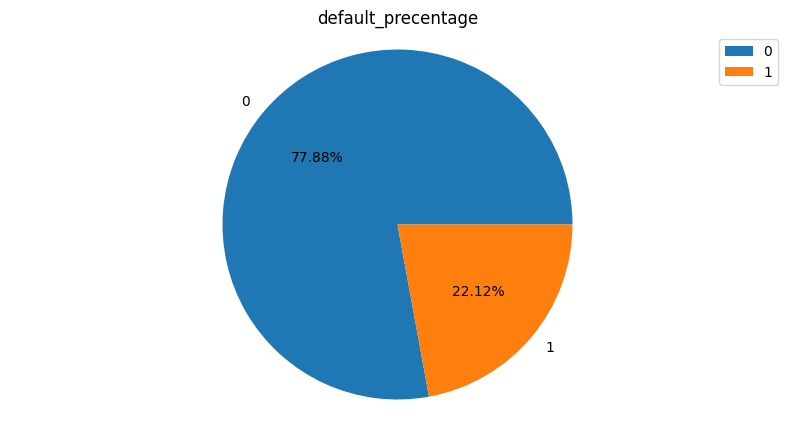

In [ ]:
exp1 = [0.05,0.05]
plot_piechart_from_column(Cr_df, 'default','default_precentage', exp1)

##### 1. Why did you pick the specific chart?

Pie chart can be used to show percentage distribution of the categories. Here it is used to show percentage of defaulters in the dataset.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that a vast majority of customers are not defaulters and 22.12% of these customers are only defaulters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be seen that the classes are heavily imbalanced favouring more towards value 0 i.e. non-defaulters. Althought it does not lead to negetive growth for the company as much, but it will need to be treated as imbalanced dataset can skew predictions.

#### Chart - 2

In [ ]:
numeric_features = Cr_df.describe().columns
numeric_features

Index(['max_credit_given', 'age', 'pay_status_sept', 'pay_status_aug',
       'pay_status_july', 'pay_status_june', 'pay_status_may',
       'pay_status_april', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june',
       'bill_may', 'bill_april', 'payment_sept', 'payment_aug', 'payment_jul',
       'payment_jun', 'payment_may', 'payment_april', 'default'],
      dtype='object')

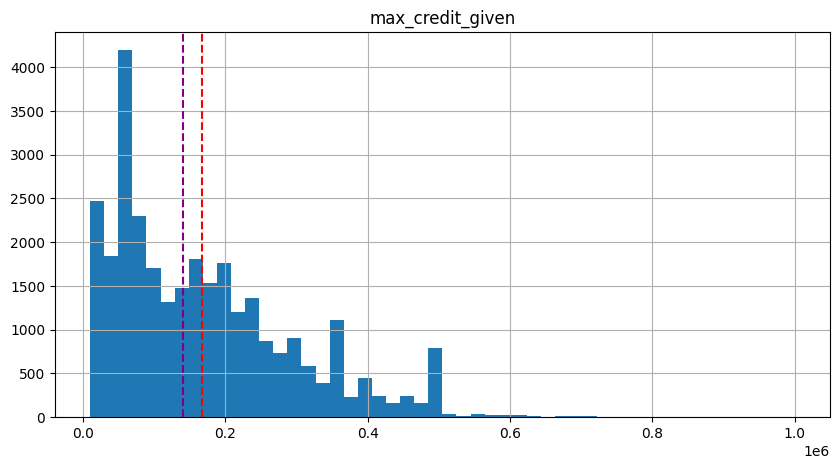

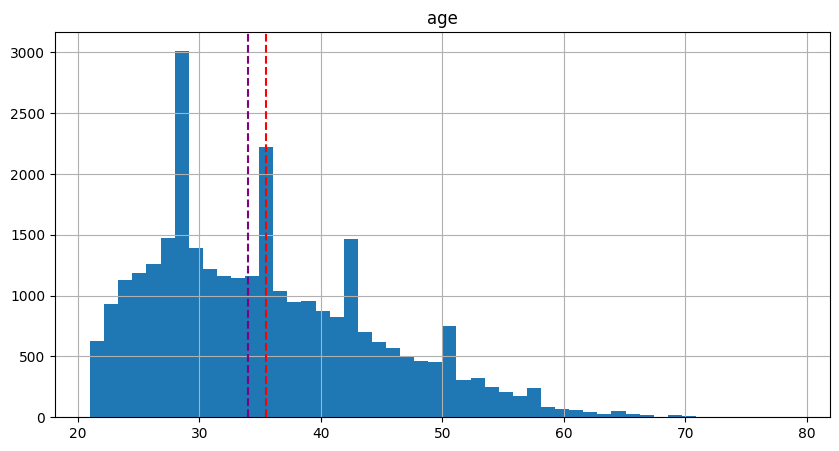

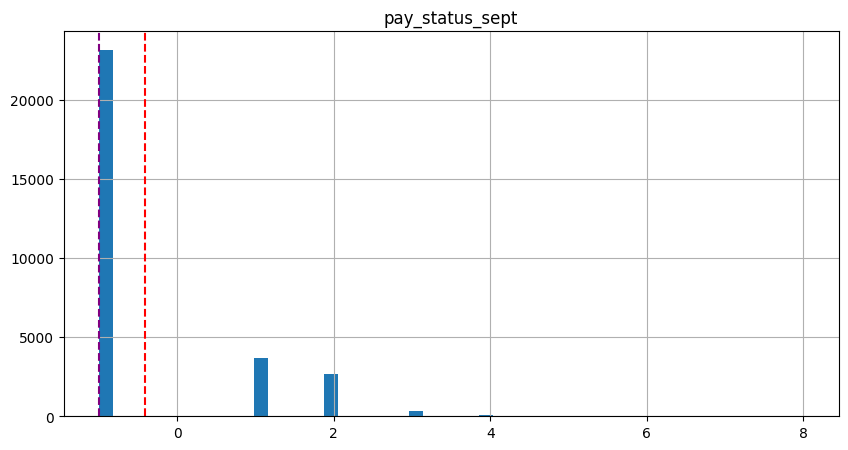

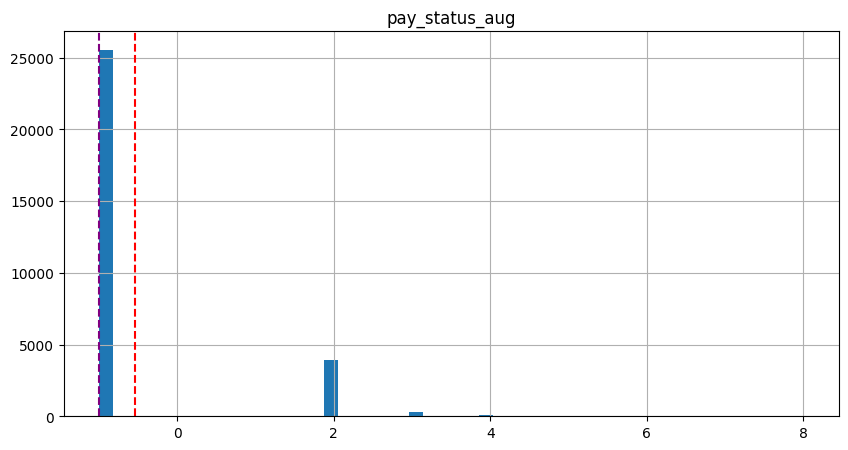

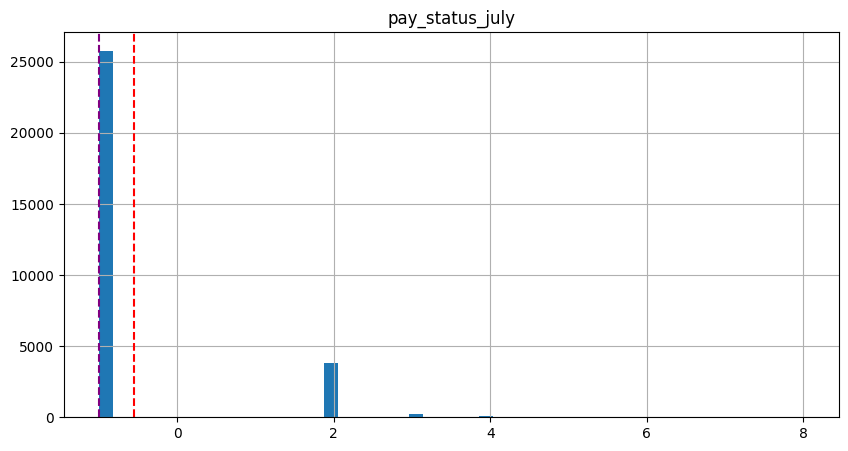

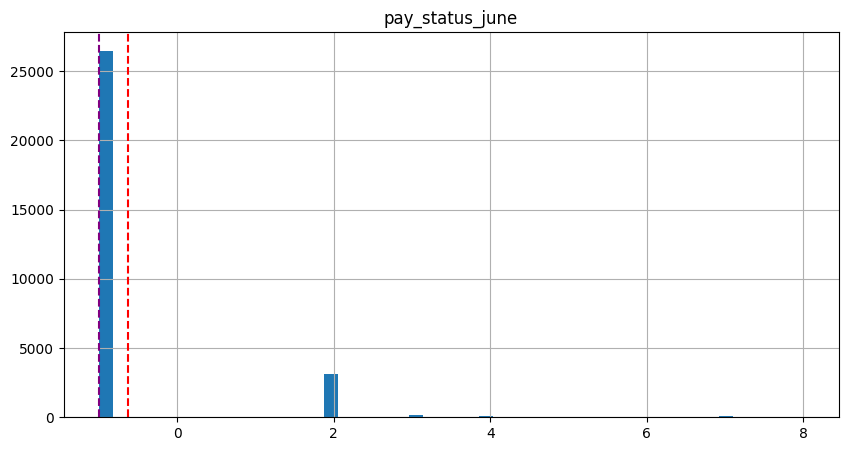

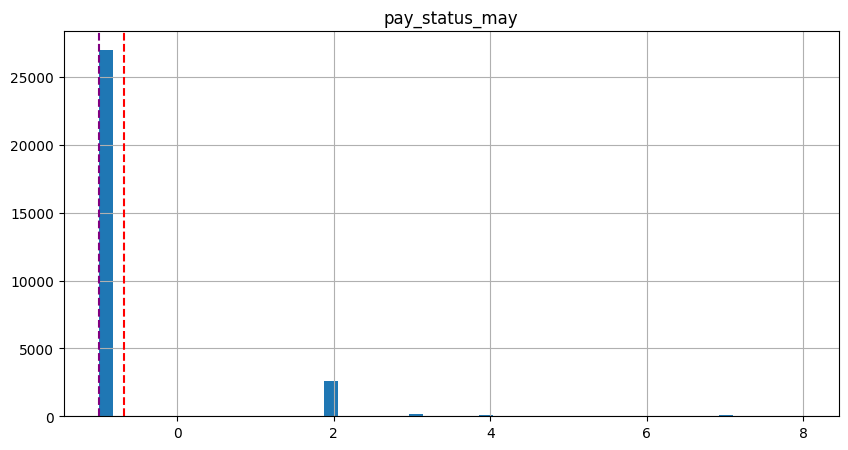

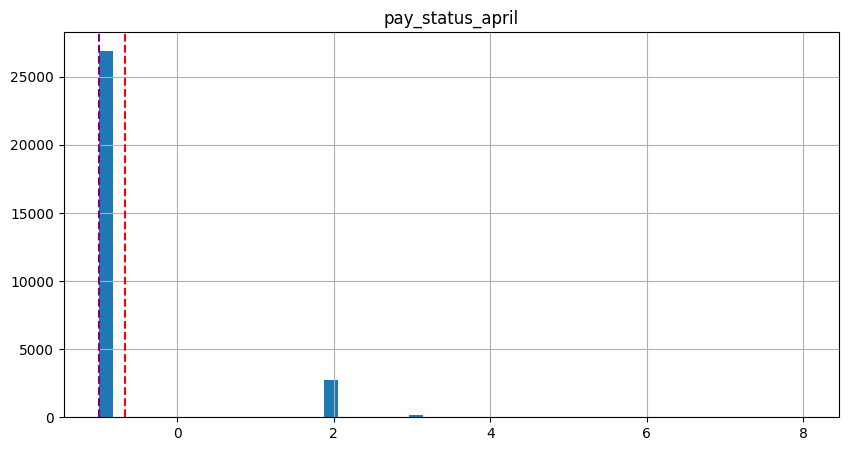

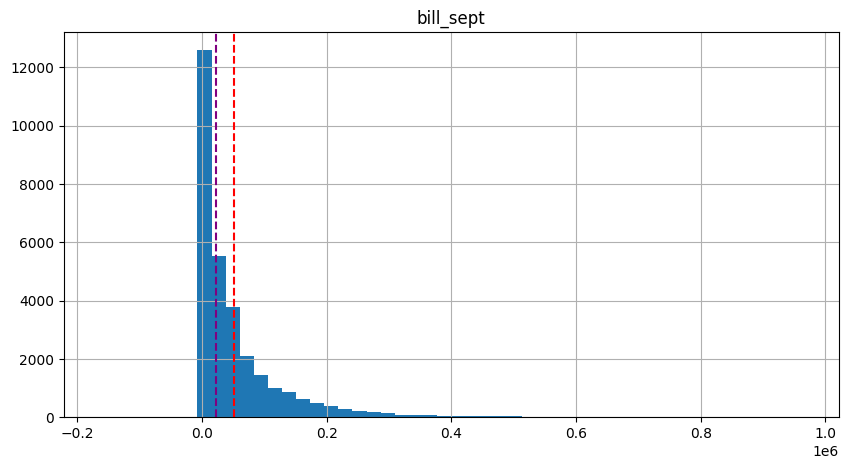

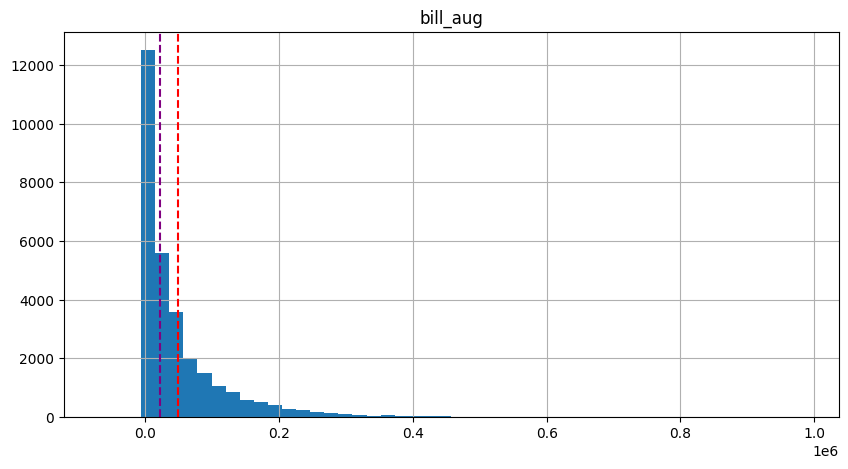

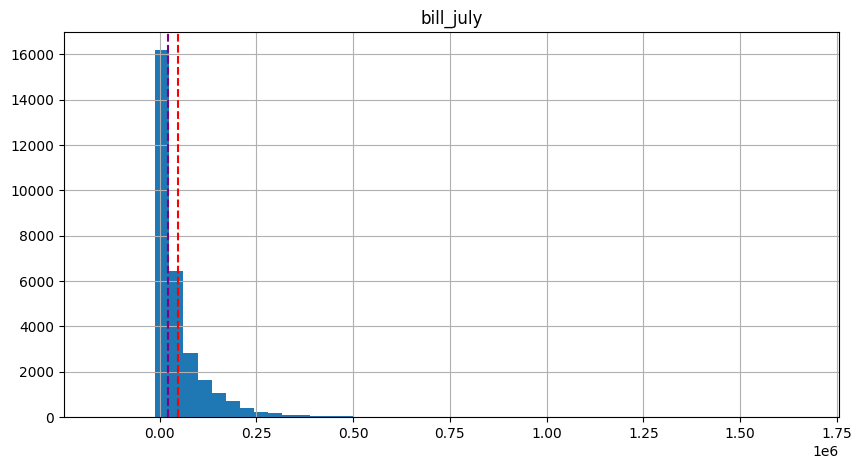

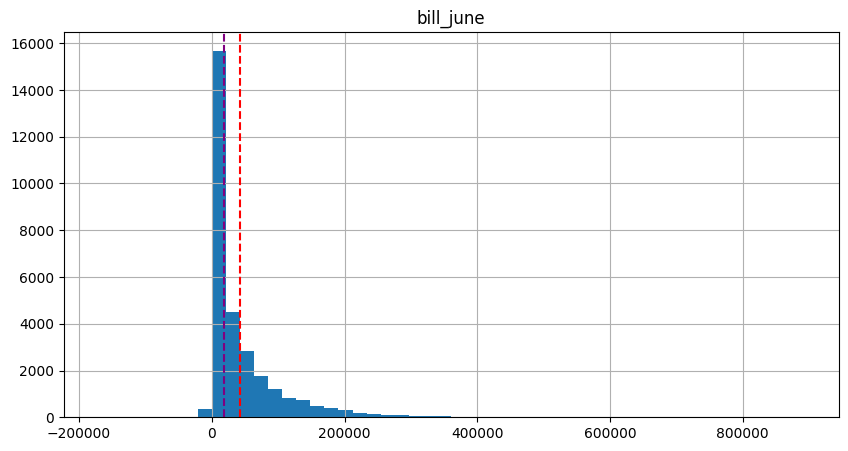

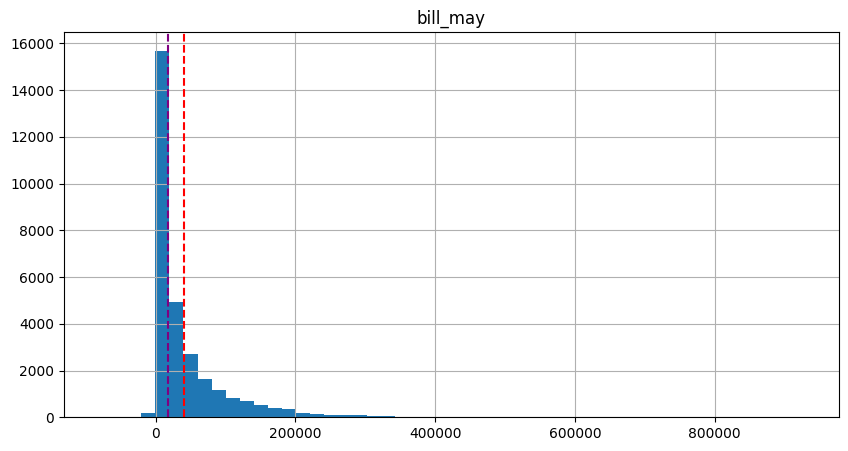

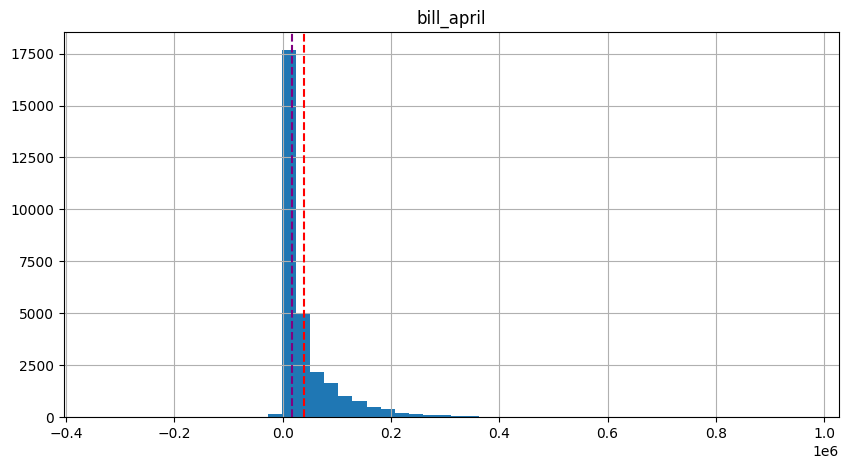

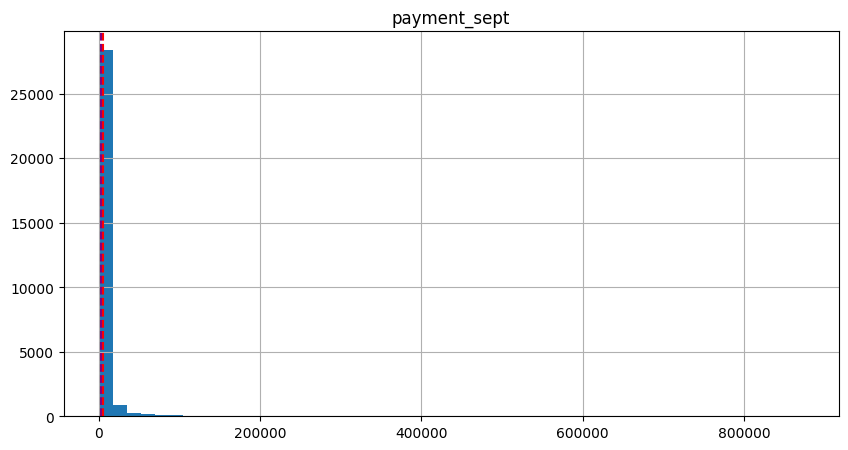

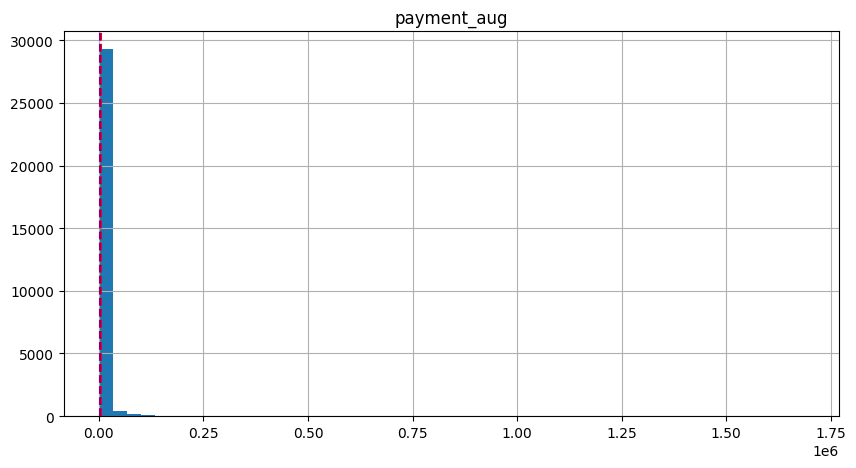

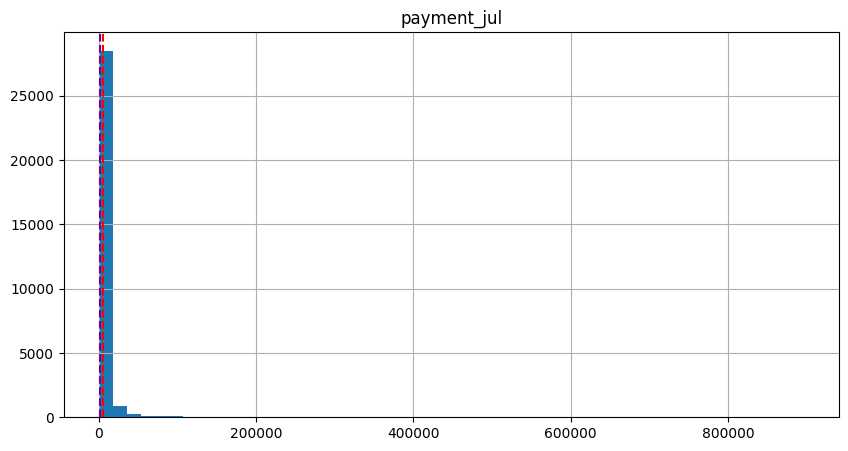

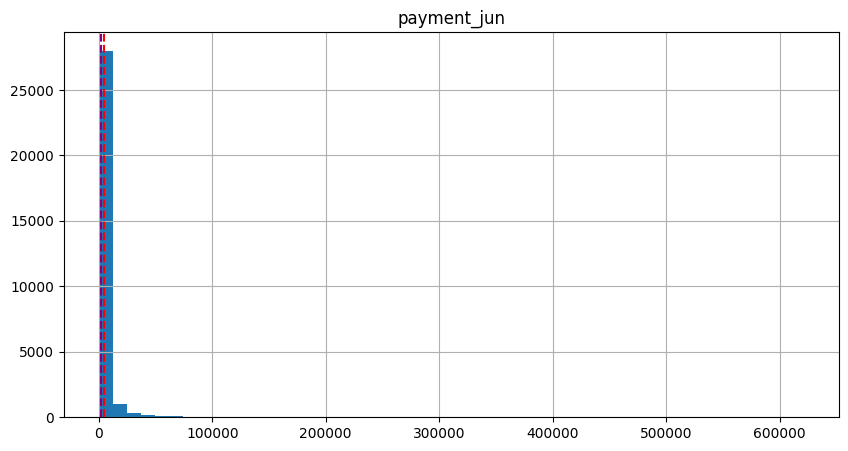

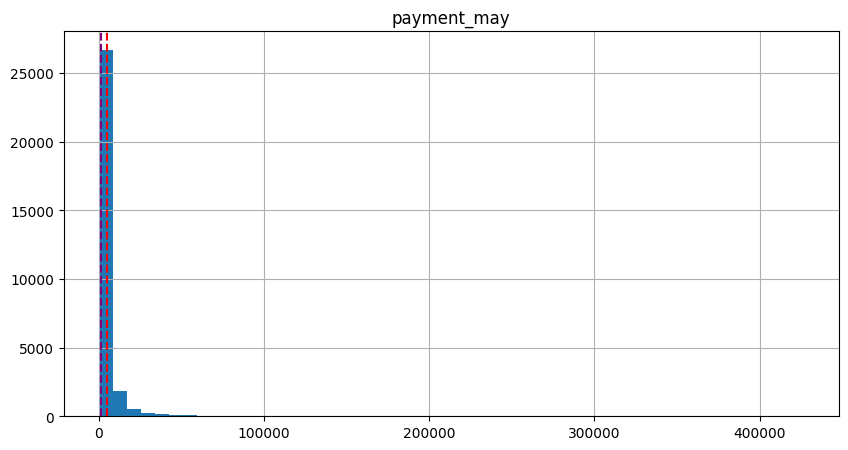

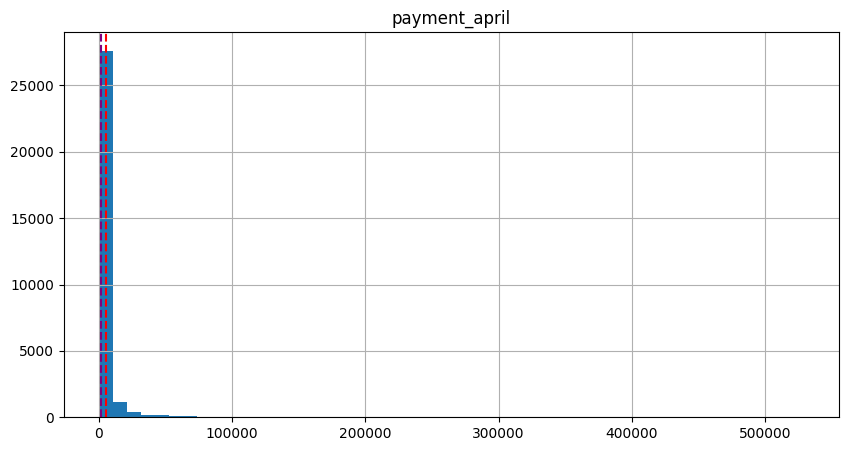

In [ ]:
for col in numeric_features[:-1]:
  fig = plt.figure(figsize = (10,5))
  ax = fig.gca()
  feature = Cr_df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color = 'Red', linestyle='dashed')
  ax.axvline(feature.median(), color='Purple', linestyle='dashed')
  ax.set_title(col)

plt.show()

##### 1. Why did you pick the specific chart?

Histogram is widely used to see the distribution of data in variables. This can be used to see the distribution of data and if they are skewed or not.

##### 2. What is/are the insight(s) found from the chart?

The features are now in a summarized manner and we can now clearly see the distribution of different feature, we can see where the mean and median lies and whether the dataset is skewed or not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Checking the distribution of data is important in building a good machine learning model as it will help us to know which type of model to use for the type of data.

#### Chart - 3

In [ ]:
categorical_features = Cr_df[['gender', 'education', 'marital_status']]

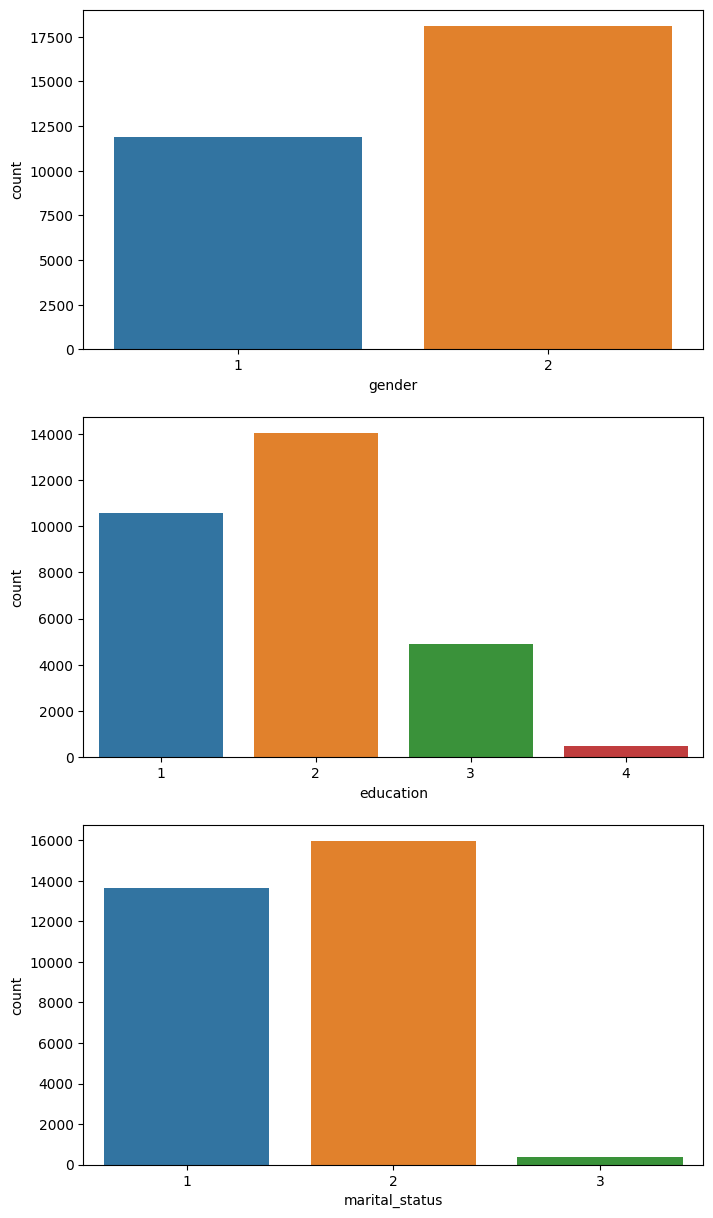

In [ ]:
fig = plt.figure(figsize = (8,15))
c = 1
for i in categorical_features:
  plt.subplot(3, 1, c)
  plt.xlabel(f'Distribution of {i}')
  sns.countplot(x = i, data = Cr_df)
  c = c + 1


##### 1. Why did you pick the specific chart?

Categorical columns can have a good understanding through bar graphs.

##### 2. What is/are the insight(s) found from the chart?

* Gender 2 takes more credit compared to Gender 1.
* Customers falling under the category 2 of 'education' take an overall more credit among others followed by category 1 and 3 respectively.
* marital status 2 take higher number of credit in martial status section.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The graphs can be used to target the type of customers who fall in a specific category for selling credits to.

**Bivariate analysis**
#### Chart - 4

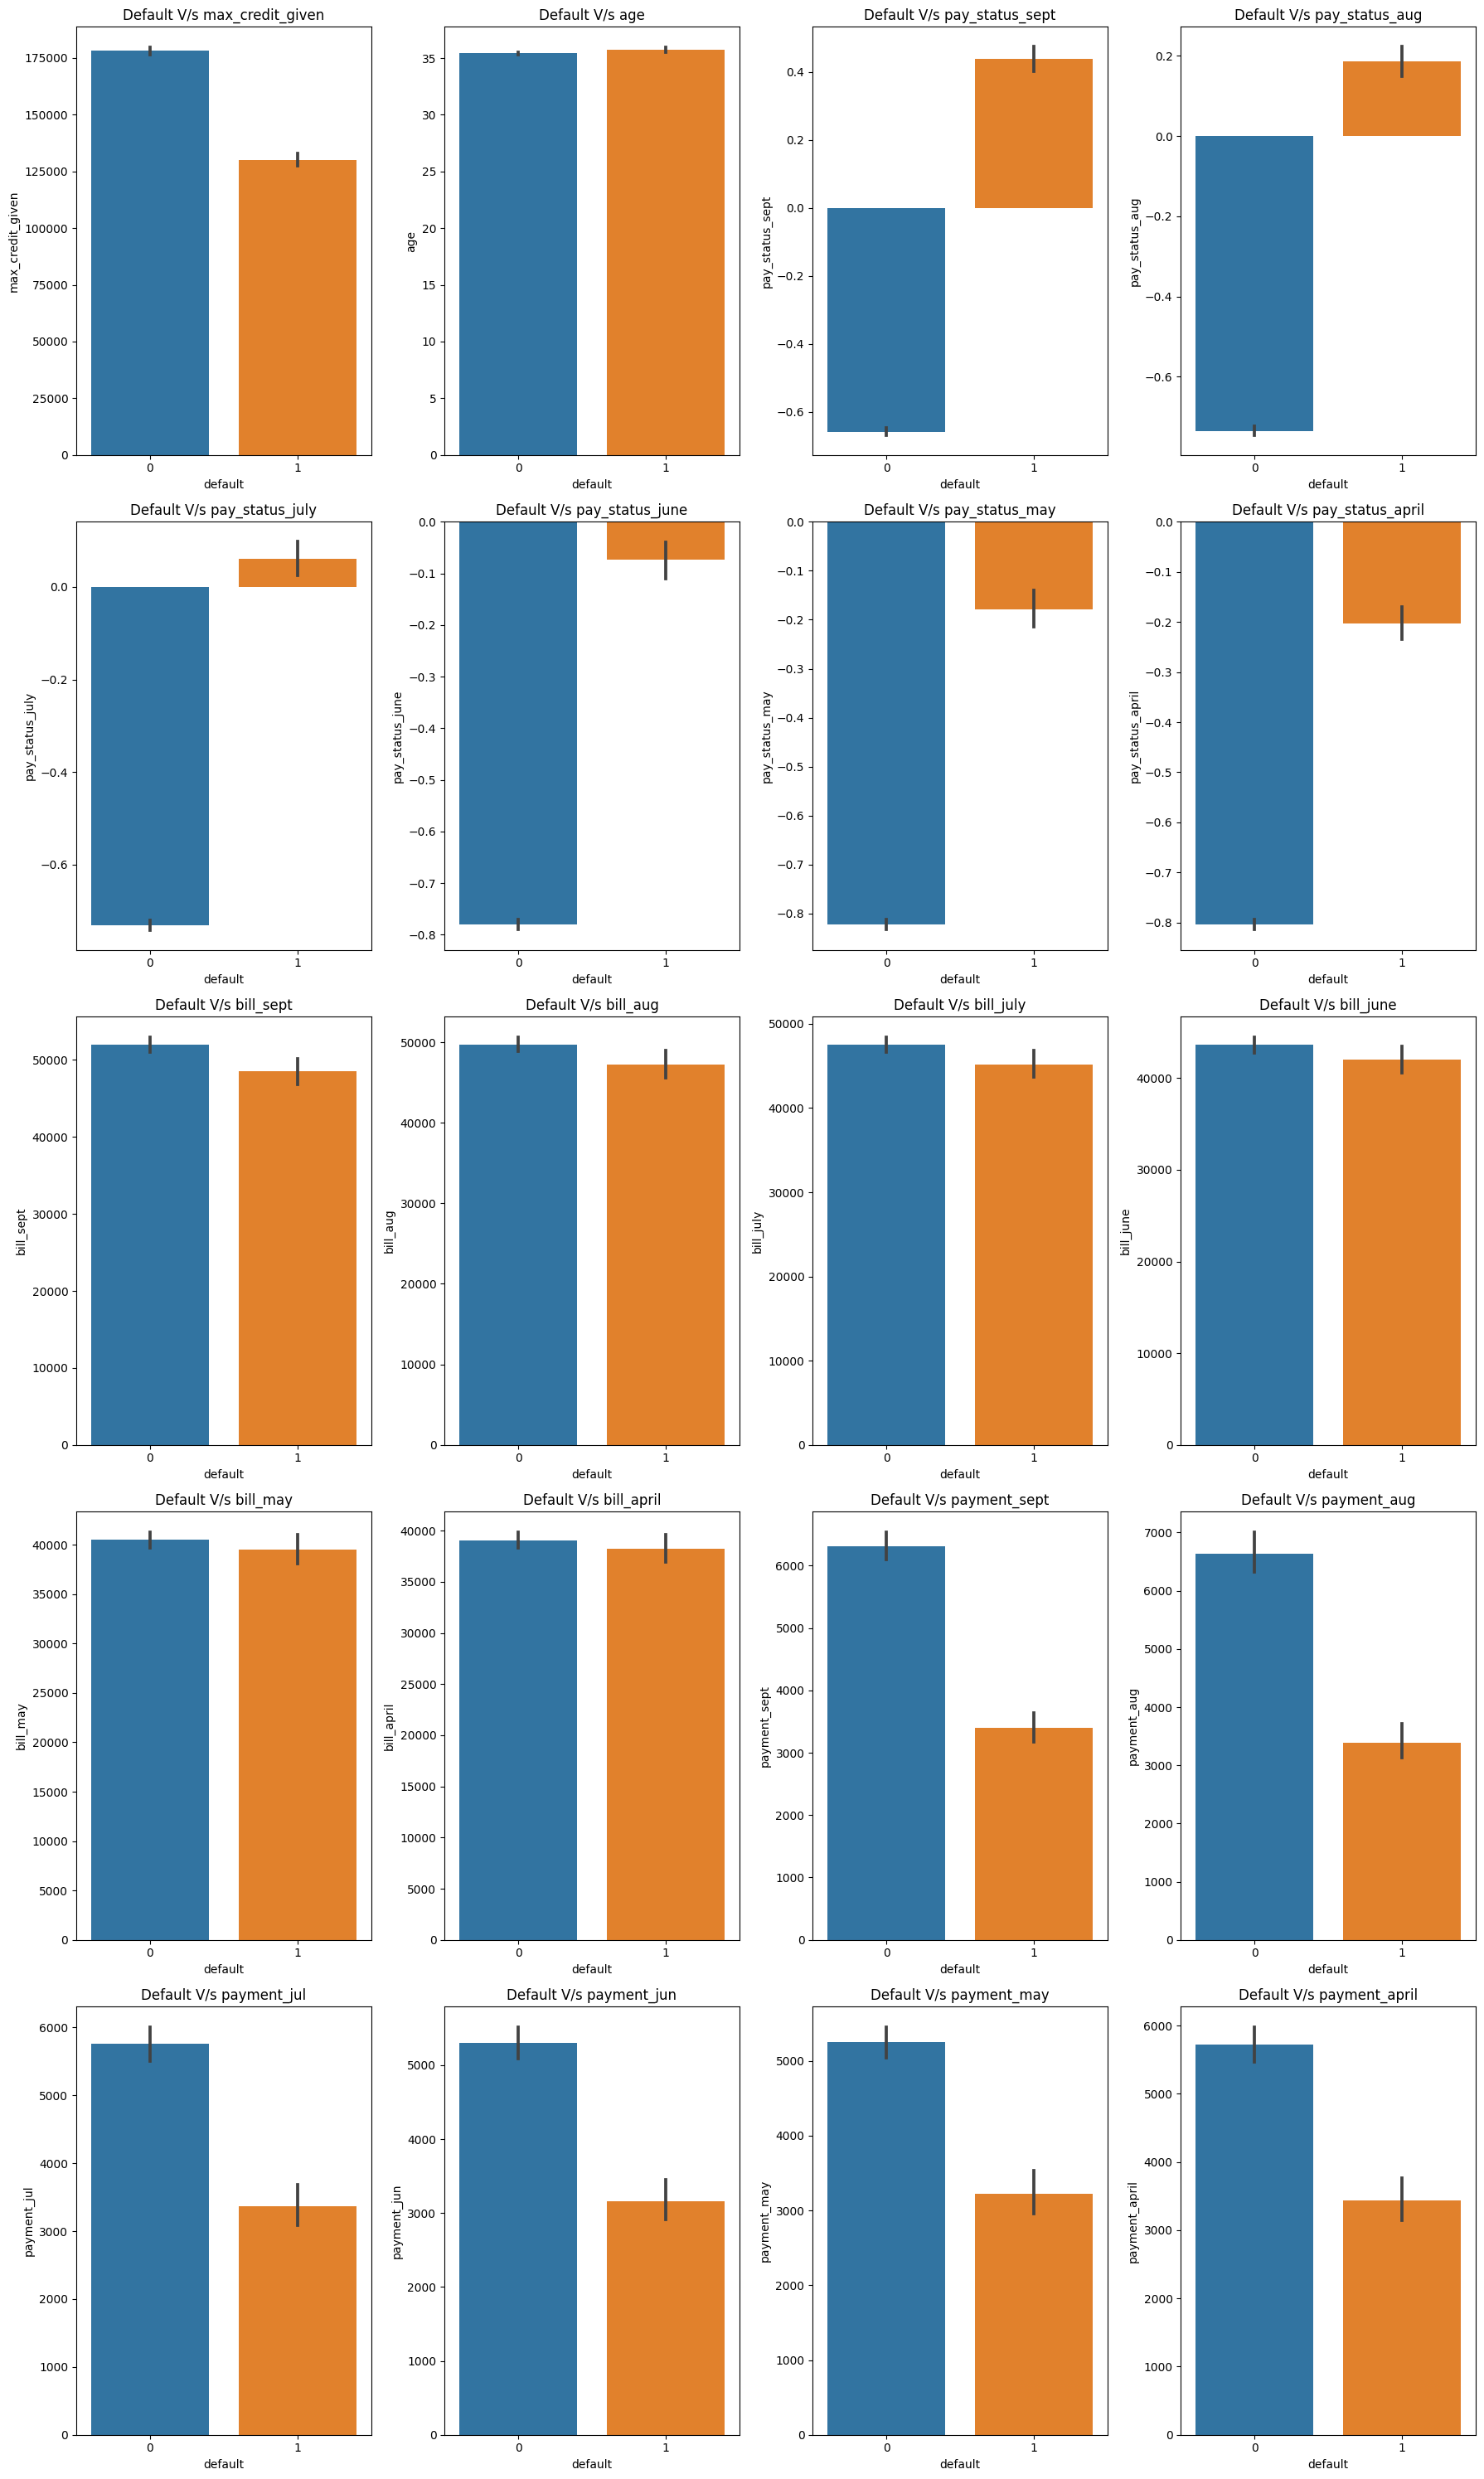

In [ ]:
plt.figure(figsize = (18,30))
c = 1
for var in numeric_features[:-1]:
  plt.subplot(5,4,c)
  sns.barplot(x = Cr_df['default'], y = Cr_df[var])
  plt.title(f'Default V/s {var}')
  c += 1
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

To show the relationship between different numeric independent variables with respect to the default target variable.

##### 2. What is/are the insight(s) found from the chart?

We can see how defaults are with respect to different columns. Defaults for certain columnns are nearly equal to non-defaulters in like for in age and bill in different months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graphs it can be seen that certain features affect less as compared to others when it comes to default, thus establishing relationships which we will look at later.

#### Chart - 5

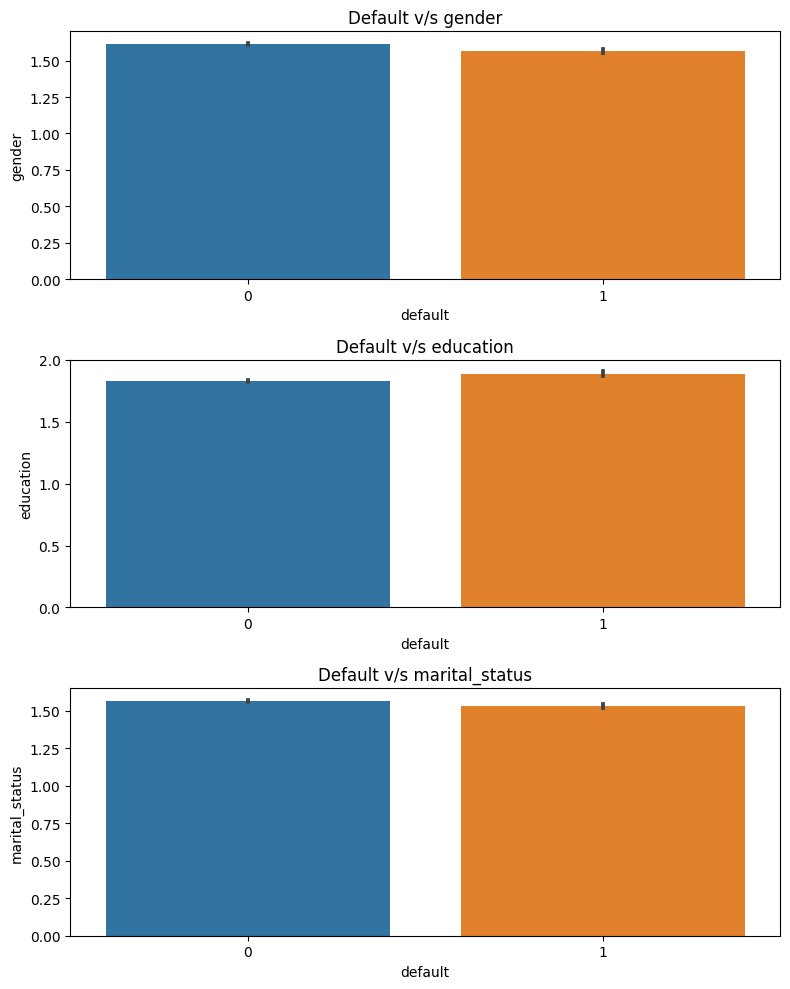

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,10))
counter=1

for j in categorical_features:
  plt.subplot(3,1,counter)
  sns.barplot(x=Cr_df['default'],y=Cr_df[j])
  plt.title(f'Default v/s {j}')
  counter=counter+1
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

To see relation between different features w.r.t target variable

##### 2. What is/are the insight(s) found from the chart?

It can  be seen that the ratio between paid in time and default is same for all three categorical variables.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The relationship discovered here will be better used in machine learning models for predictions.

#### Chart - 6 - Correlation Heatmap

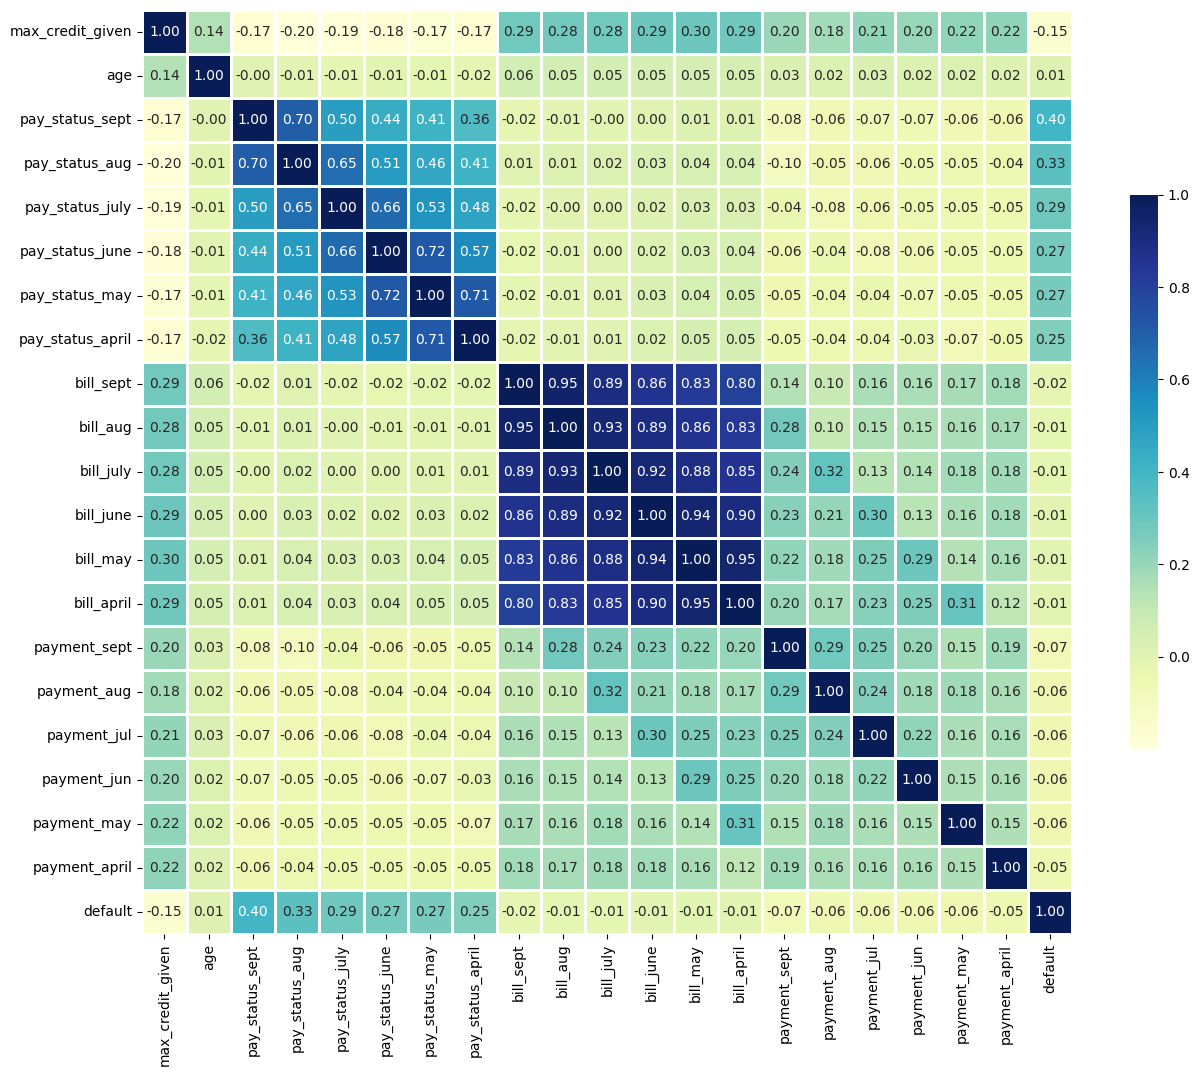

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(Cr_df.corr(), cmap="YlGnBu", cbar_kws={'shrink': .6}, annot=True, fmt='.2f', linewidths=.8)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation map can be used to find correlations and multicollinearity visually.

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be seen that bill from april to september are correlated since they all are bill amounts.

Apart from that there does not seem to have multicollinearity to a high extent.

#### Chart - 7 - Pair Plot

In [ ]:
# Pair Plot
sns.pairplot(Cr_df, hue = 'default')

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.The Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

Here you can see the distribution of defaults with different types of columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
Cr_df.isna().value_counts().reset_index().sum()

max_credit_given        0
gender                  0
education               0
marital_status          0
age                     0
pay_status_sept         0
pay_status_aug          0
pay_status_july         0
pay_status_june         0
pay_status_may          0
pay_status_april        0
bill_sept               0
bill_aug                0
bill_july               0
bill_june               0
bill_may                0
bill_april              0
payment_sept            0
payment_aug             0
payment_jul             0
payment_jun             0
payment_may             0
payment_april           0
default                 0
0                   30000
dtype: int64

It can be seen that there is no missing value in any of the columns

### 2. Handling Outliers

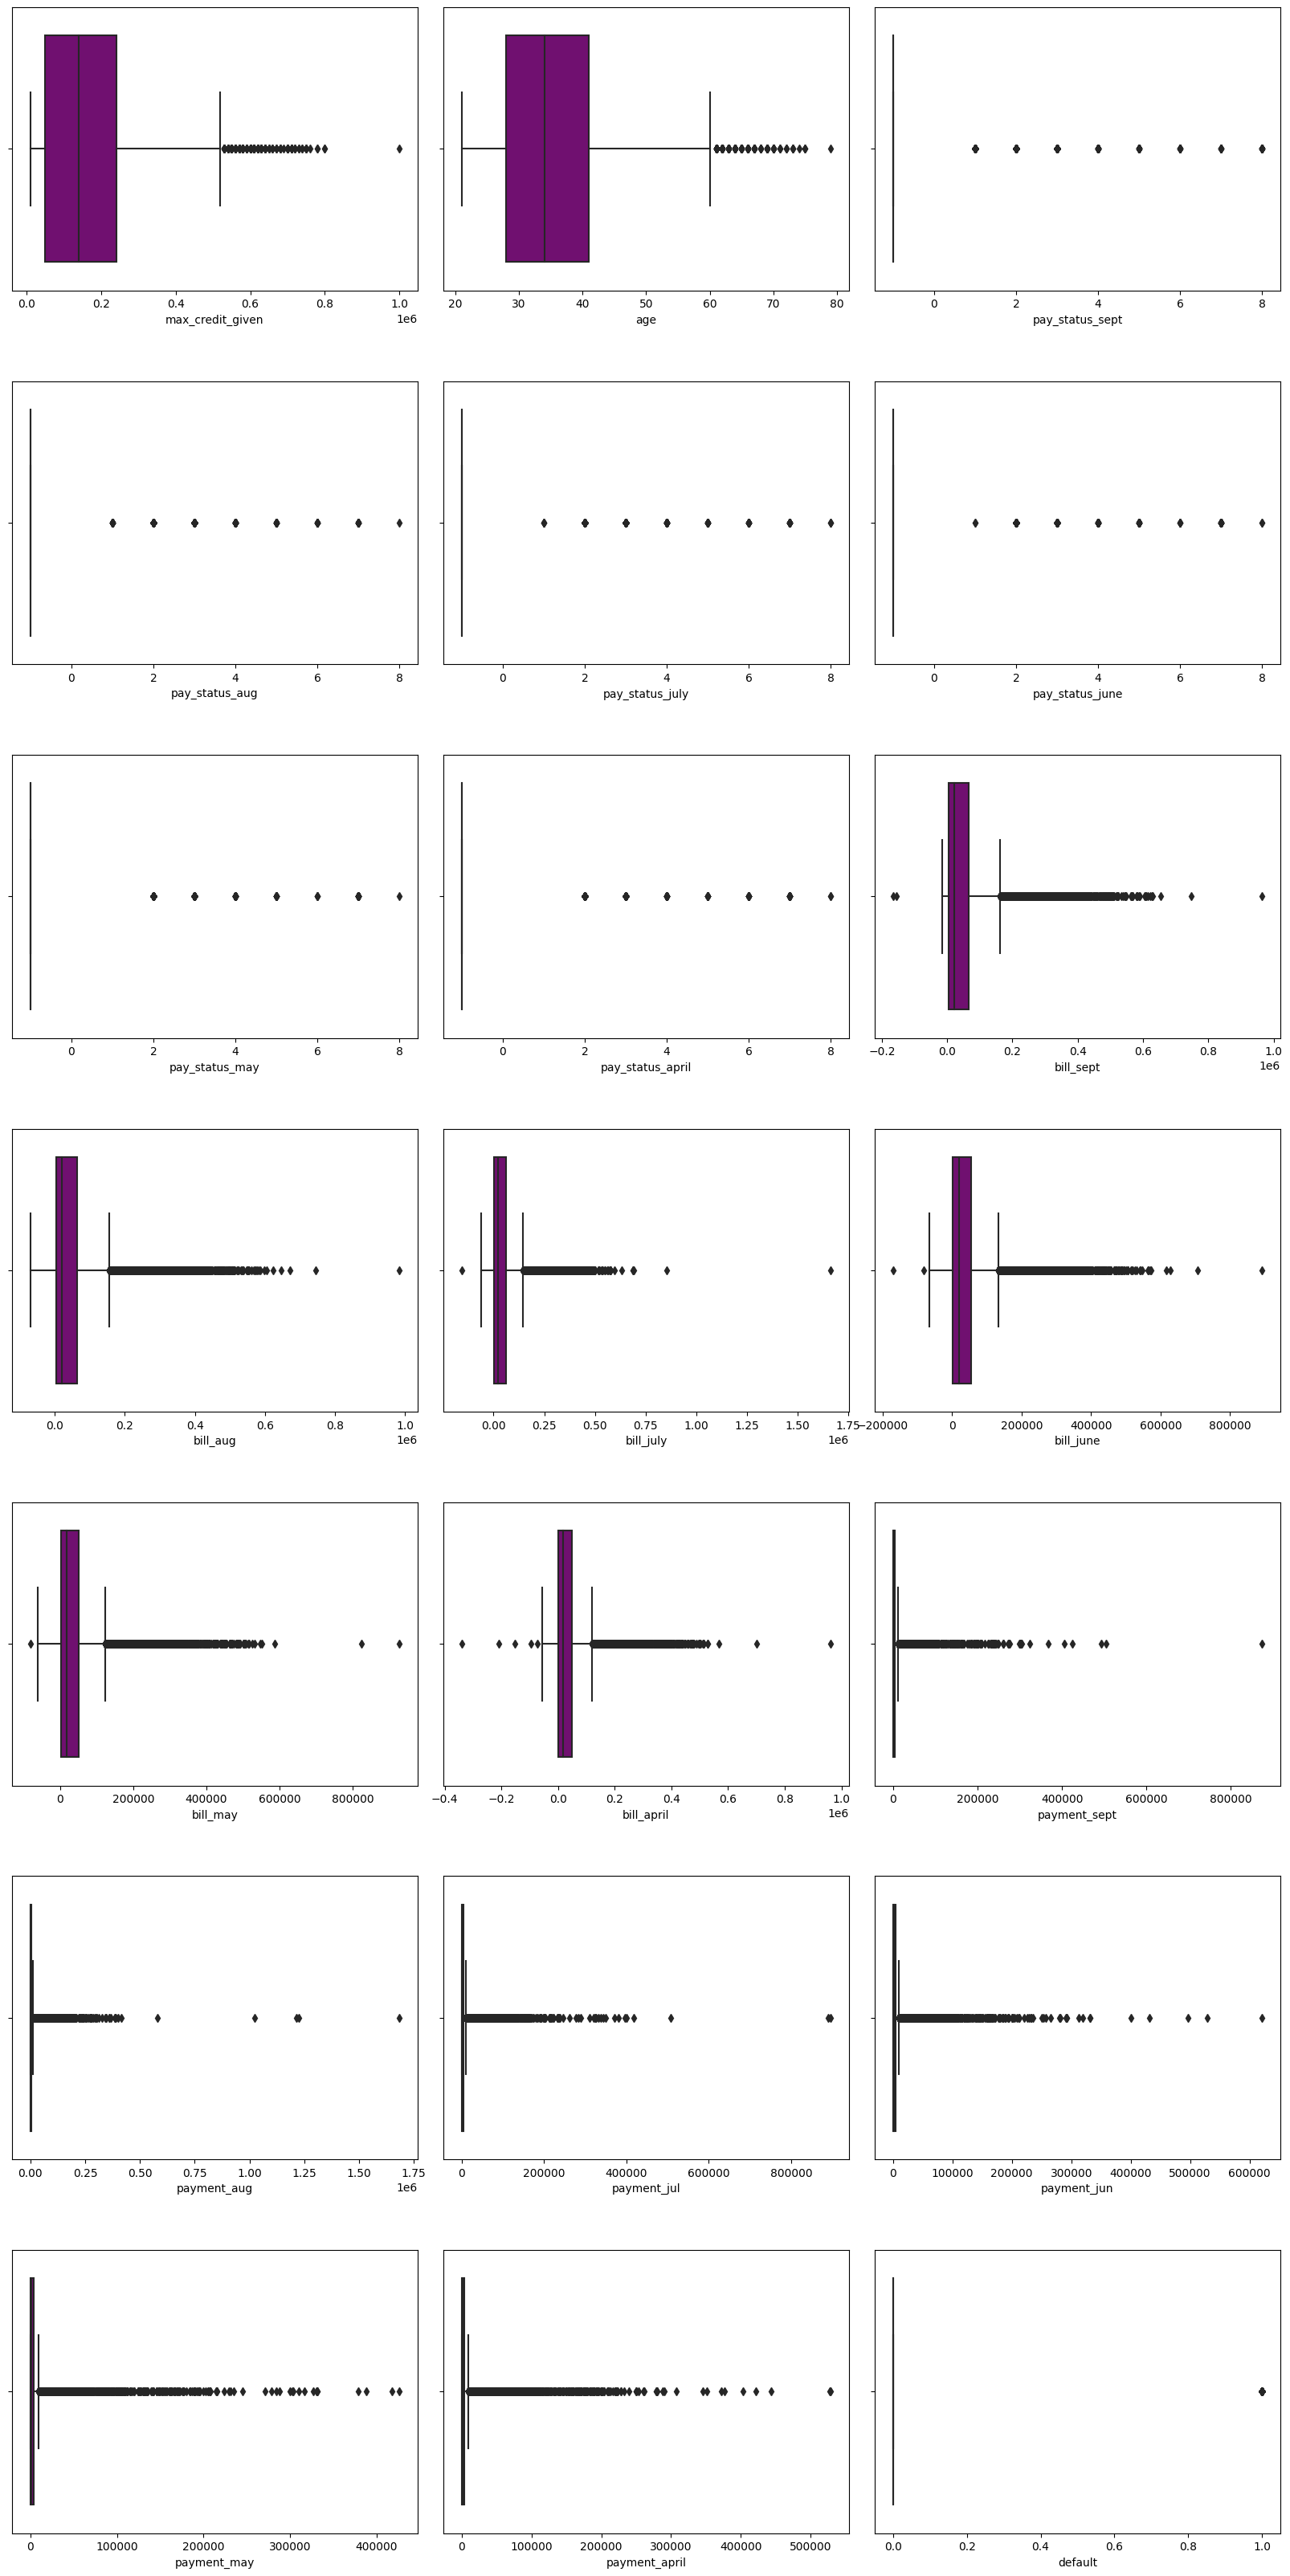

In [ ]:
# Checking for outliers
fig = plt.figure(figsize=(16,32))
c=1
for i in numeric_features :
    plt.subplot(7, 3, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=Cr_df,color="purple")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Checking for outliers
# Applying scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Cr_df)

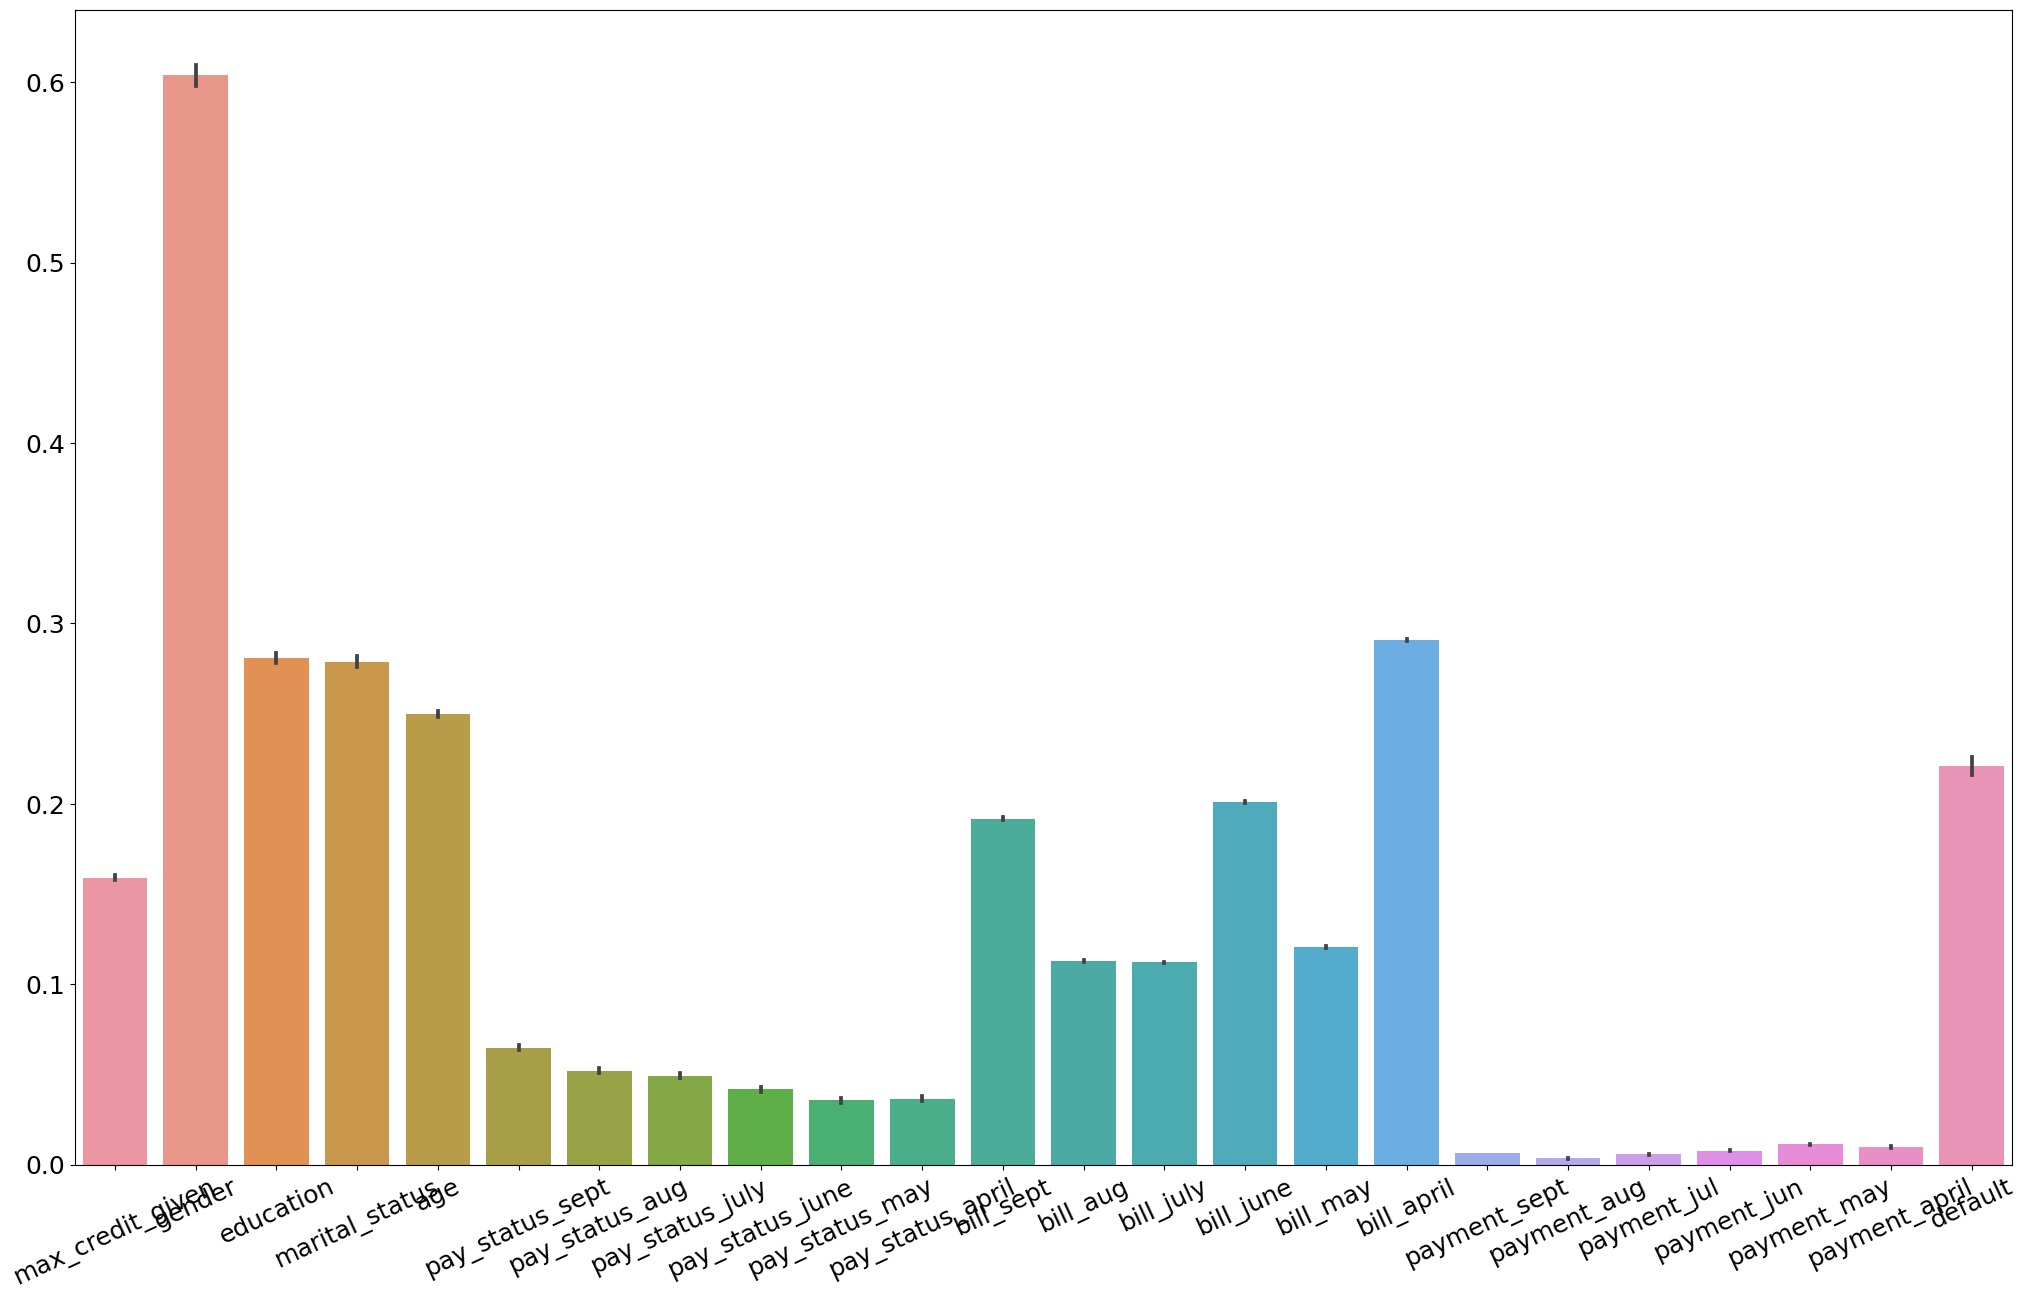

In [ ]:
cols = ['max_credit_given', 'gender', 'education', 'marital_status', 'age',
       'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default']

fig = plt.figure(1, figsize = (25,15))
ax = fig.add_subplot(111)
sns.barplot(data = scaled_data)
plt.xticks(np.arange(0,24), labels = cols, rotation = 25, fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig('Fig - Boxplot')

In [ ]:
# Applying StandardScaler
scaler = StandardScaler()
scaled_data_1 = scaler.fit_transform(Cr_df)

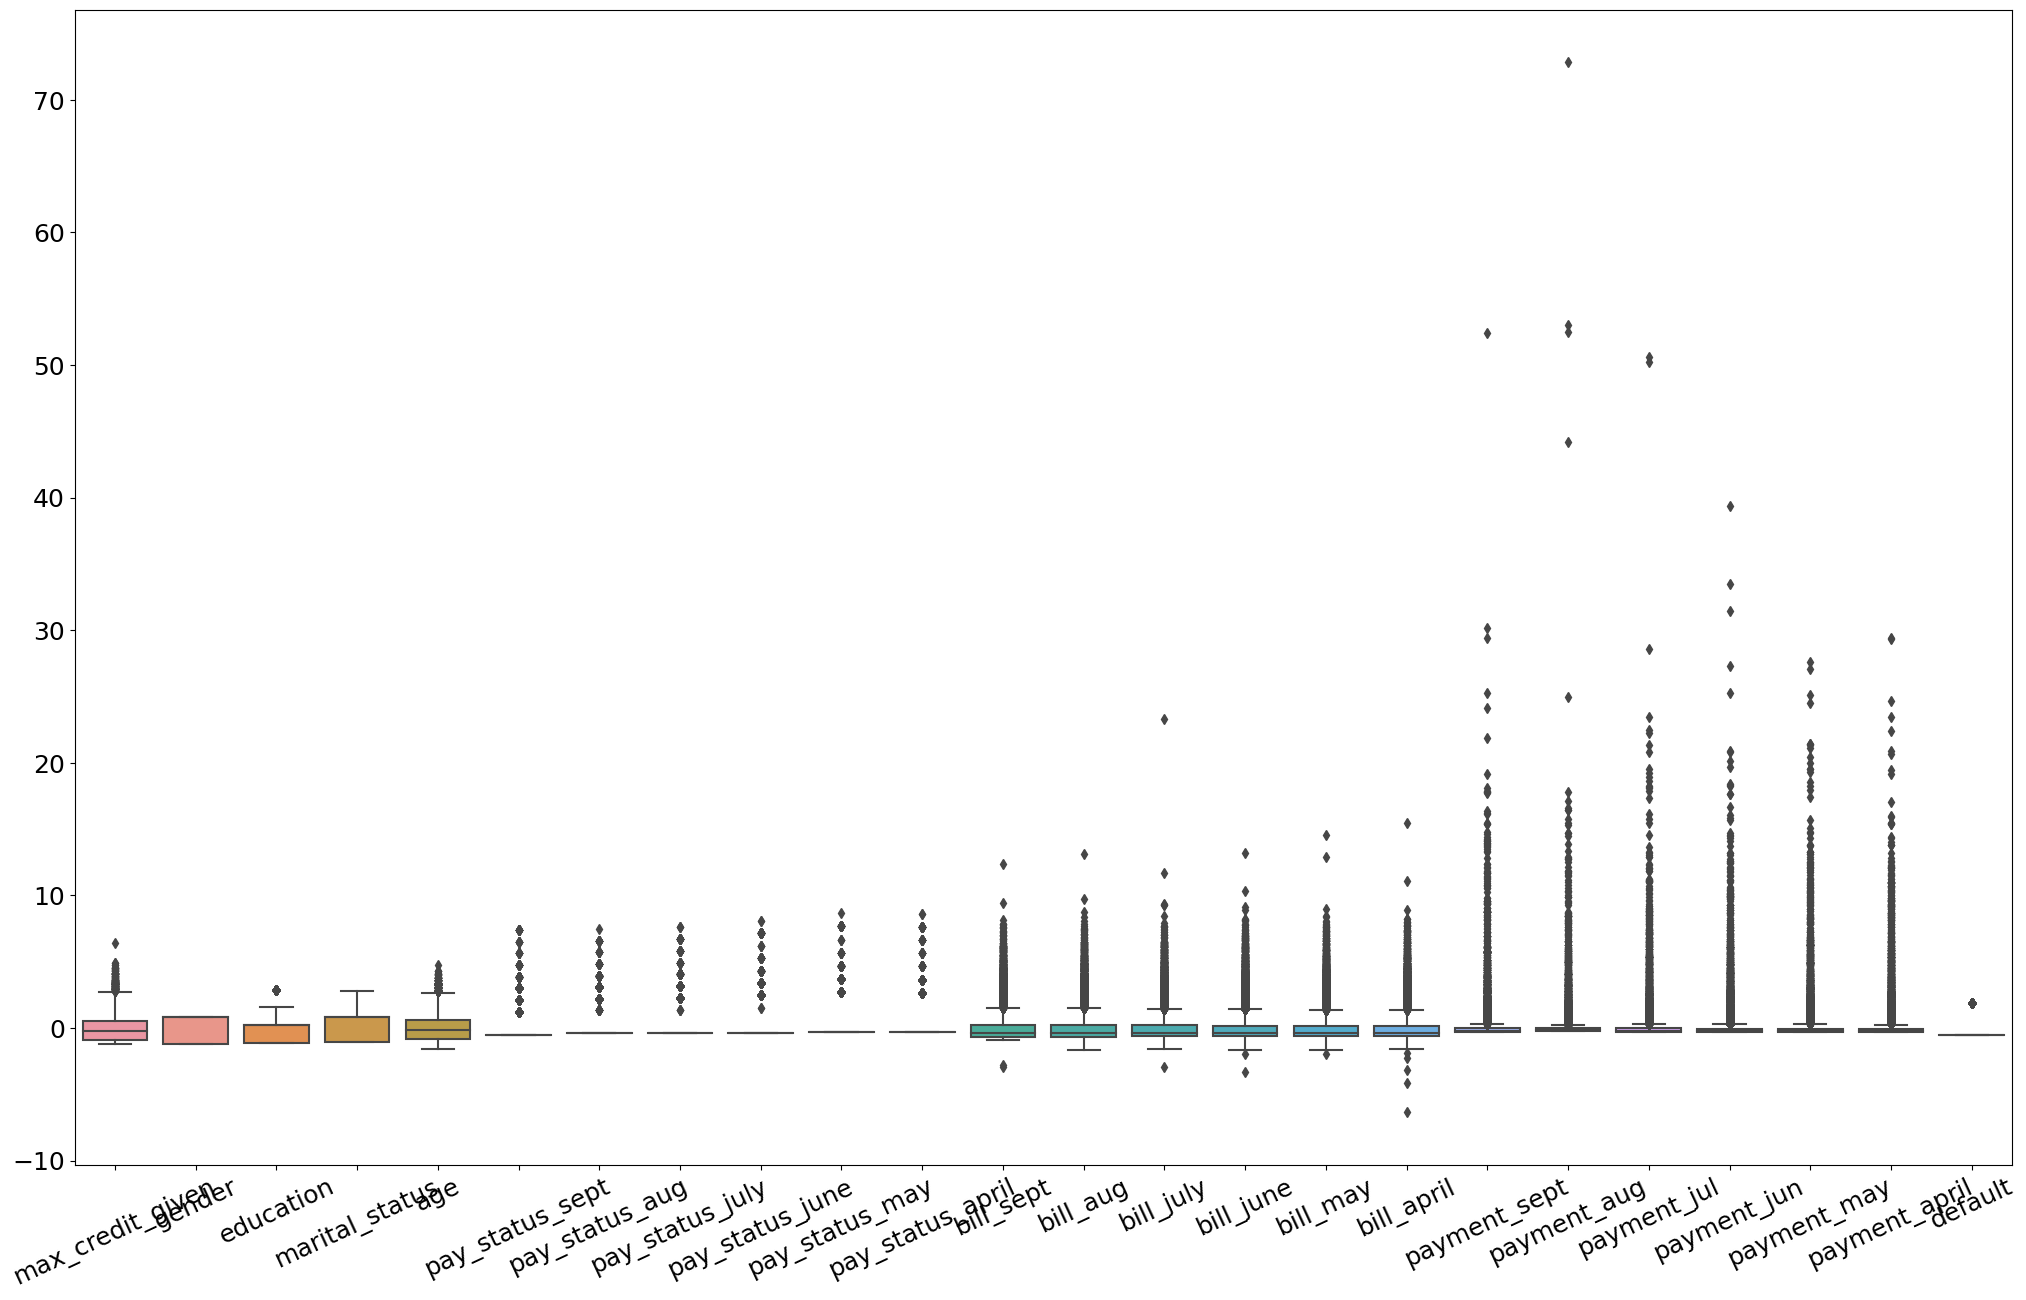

In [ ]:
fig = plt.figure(1, figsize = (25,15))
ax = fig.add_subplot(111)
sns.boxplot(data = scaled_data_1)
plt.xticks(np.arange(0,24), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('Fig - Boxplot Std Scaler')

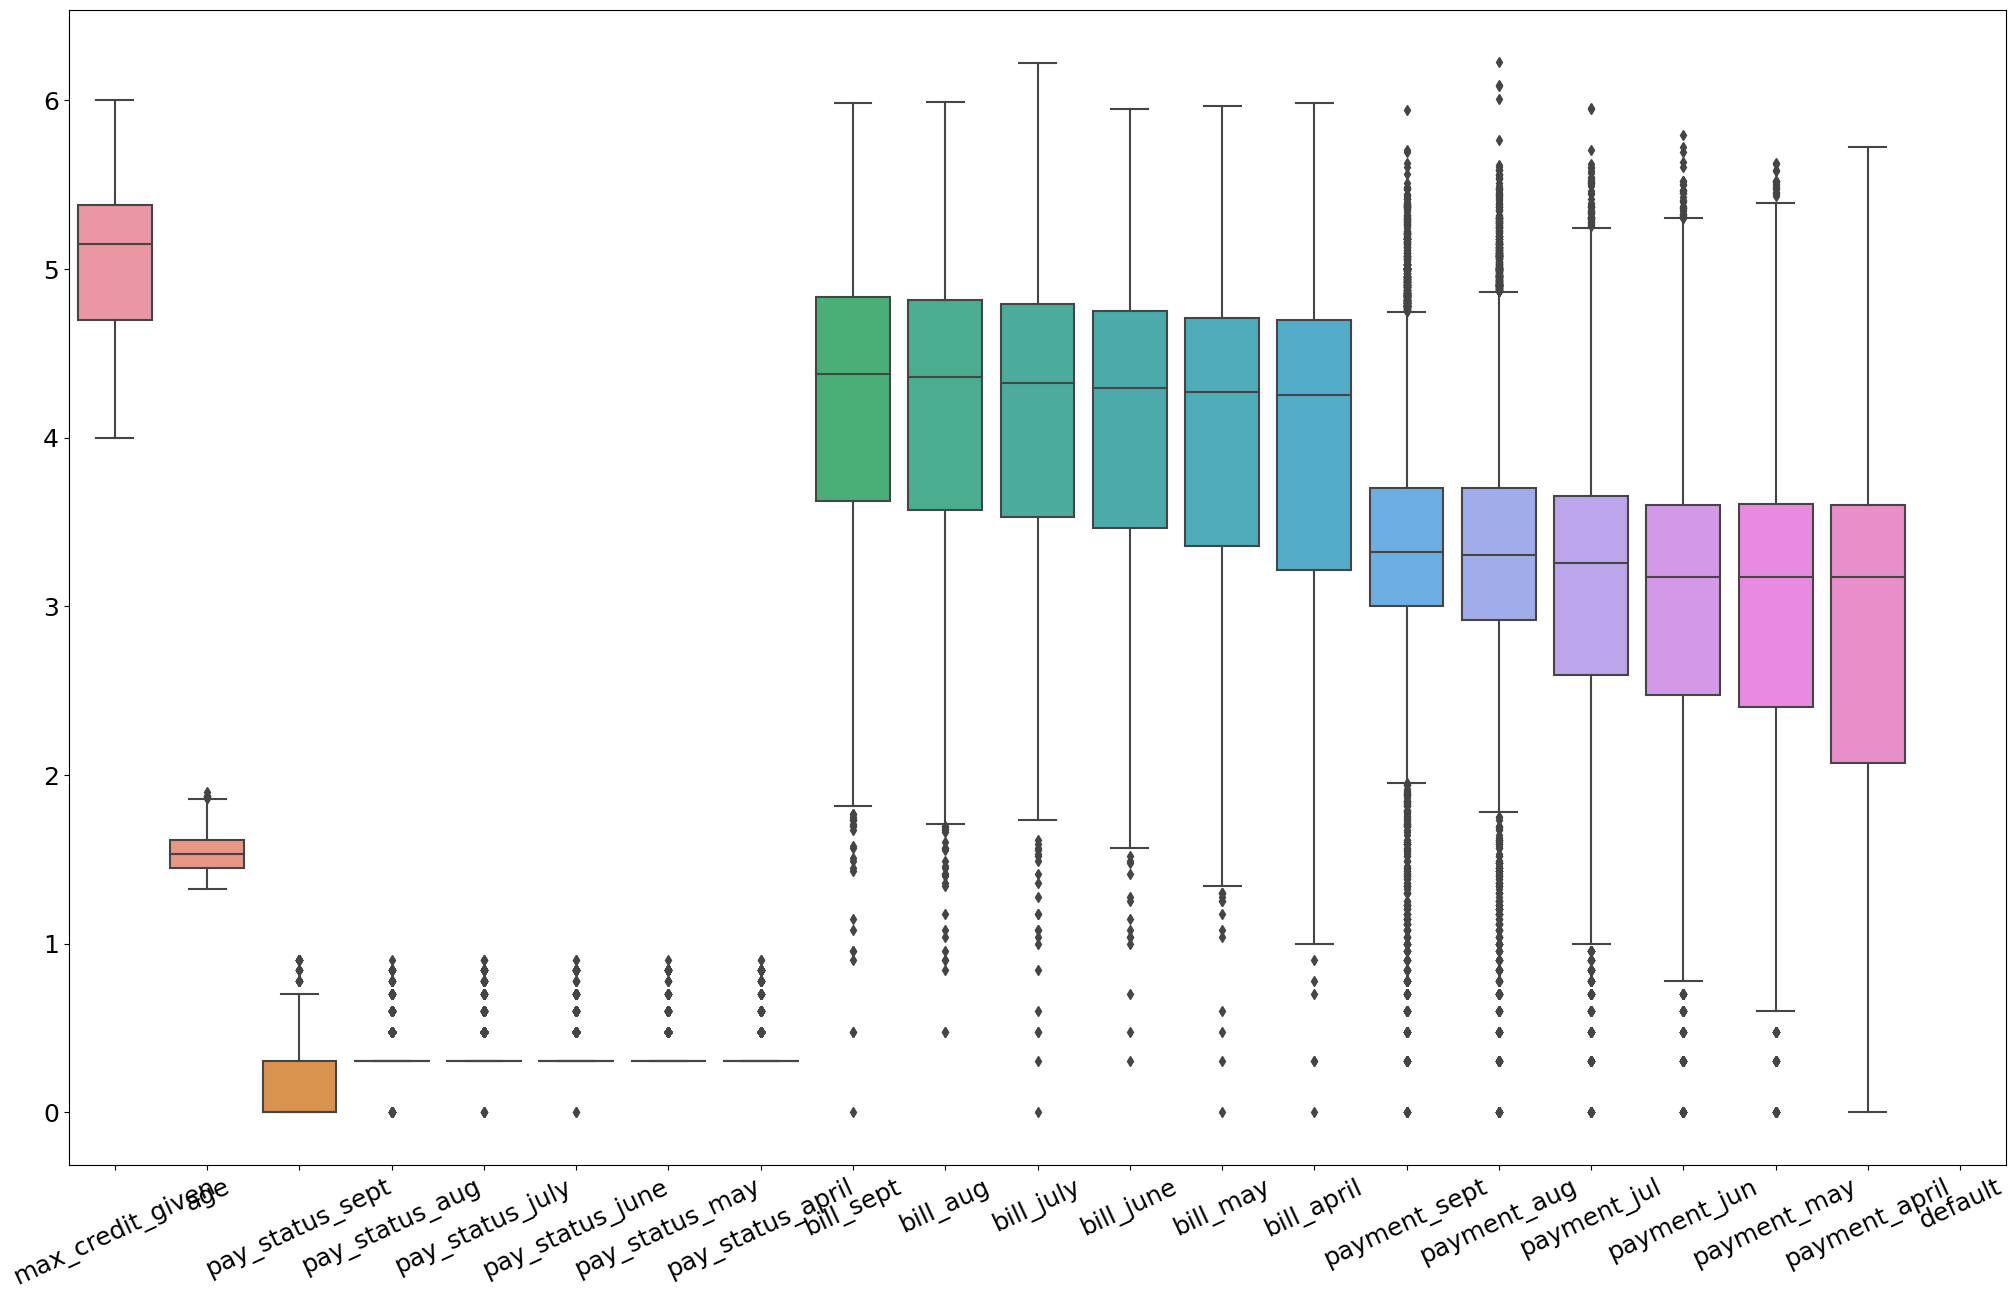

In [ ]:
# Applying Log scale to the data
scaled_data_2 = np.log10(Cr_df[numeric_features]).values

cols = ['max_credit_given', 'age',
       'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default']

fig = plt.figure(1, figsize=(25,15))
ax = fig.add_subplot(111)
sns.boxplot(data = scaled_data_2)
plt.xticks(np.arange(0,21), labels = cols, rotation = 25, fontsize = 18)
plt.yticks(fontsize = 18)

plt.savefig('Fig - Boxplot log Scaler')

##### What all outlier treatment techniques have you used and why did you use those techniques?

The boxplots for each of the numerical features are plotted in order for us to get a better view of the outliers. Here we can see that quite a lot of values lie outside of the interquartile ranges. Three scaling techniques are used here i.e MinMaxScaler, StandardScaler and Log10 scale transform.

Since even after applying scaling there is still a large quantity of data lying in outlier area, it is quite possible they are not outliers and hold significant value and hence it is best to not disturb them by deleting.

### 3. Categorical Encoding

In [ ]:
# Encoding categorical columns
Cr_df = pd.get_dummies(Cr_df)
Cr_df.head()

,max_credit_given,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,...,default,gender_1,gender_2,education_1,education_2,education_3,education_4,marital_status_1,marital_status_2,marital_status_3
1,20000,24,2,2,-1,-1,-1,-1,3913,3102,...,1,0,1,0,1,0,0,1,0,0
2,120000,26,-1,2,-1,-1,-1,2,2682,1725,...,1,0,1,0,1,0,0,0,1,0
3,90000,34,-1,-1,-1,-1,-1,-1,29239,14027,...,0,0,1,0,1,0,0,0,1,0
4,50000,37,-1,-1,-1,-1,-1,-1,46990,48233,...,0,0,1,0,1,0,0,1,0,0
5,50000,57,-1,-1,-1,-1,-1,-1,8617,5670,...,0,1,0,0,1,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical values were already fixed only a few additions needed to be made. Dummification techniques were used here to helf machine learning models to better understand the dataset. Some feature engineering was already applied such as replacing some unknown values such as in martital_status and education features. Some changes were also made in payement features.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

'ID' column was removed from the dataset as that has all unique values and it was not neccesssary for analysis.

#### 2. Feature Selection

<Axes: >

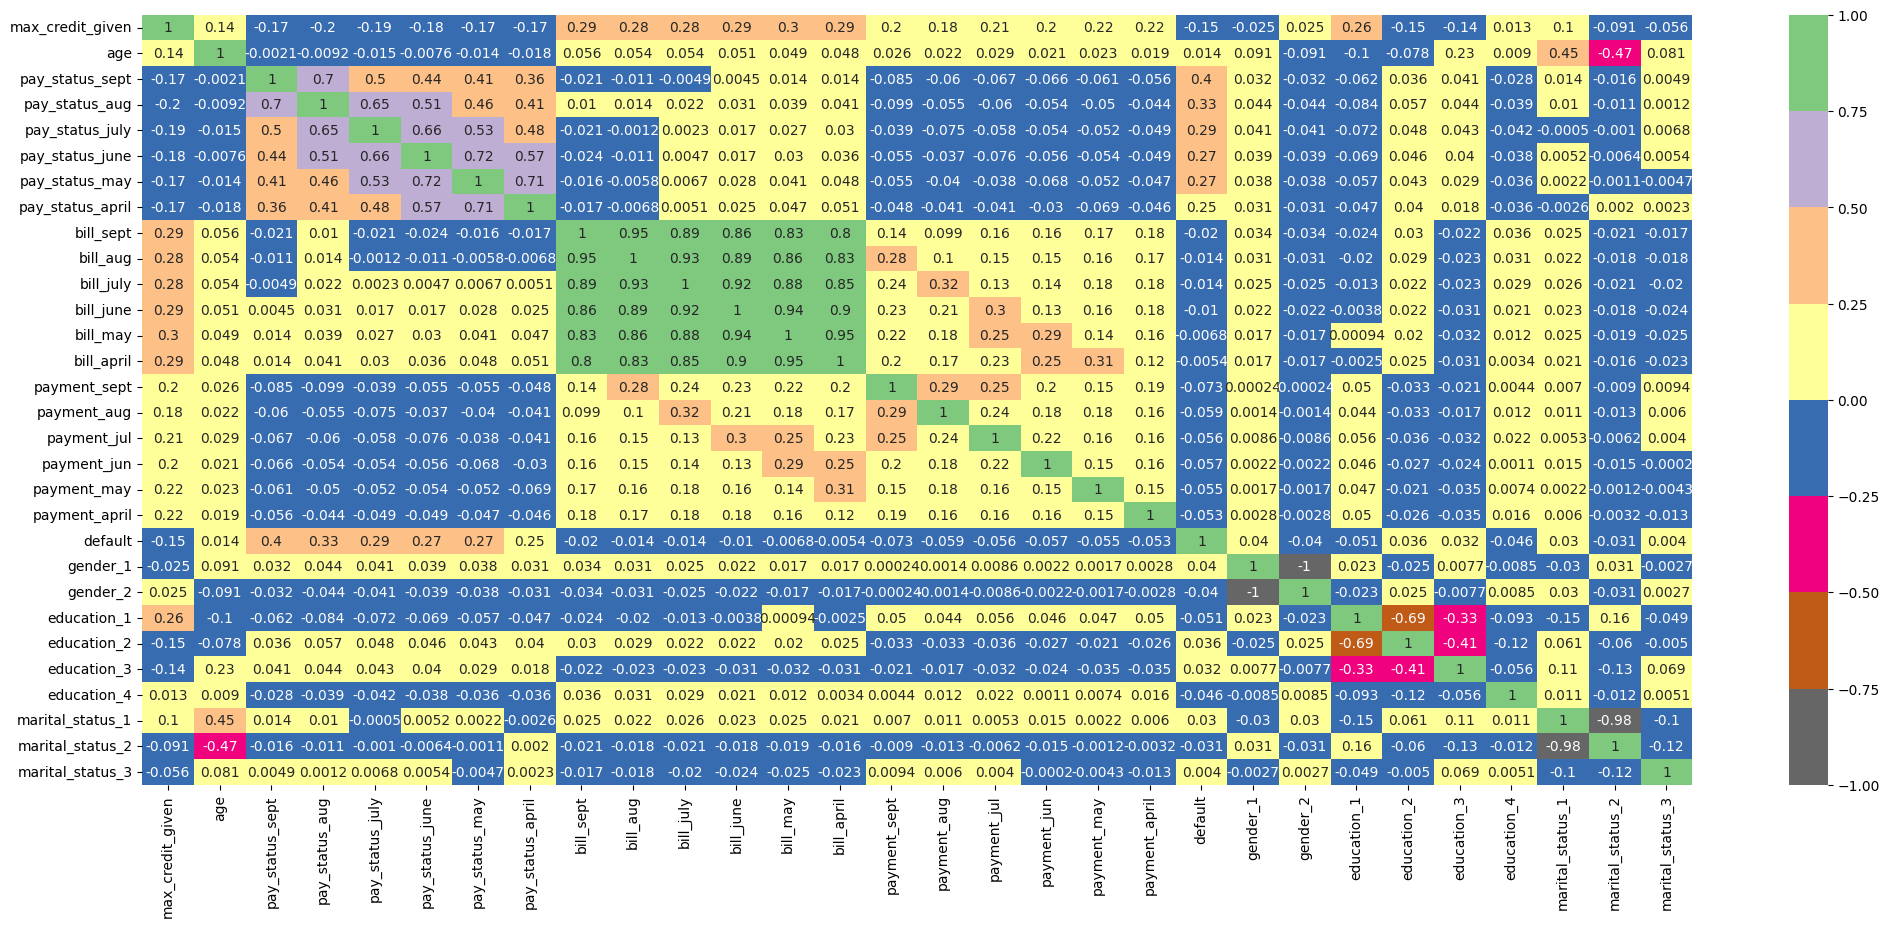

In [ ]:
# Select your feature carefully to avoid overfitting
corr = Cr_df.corr()
plt.figure(figsize = (25,10))
sns.heatmap(corr, annot = True, cmap = plt.cm.Accent_r)

It can be seen that there is no such highly correlated data.

### 5. Data Transformation

No transformation will be done

### 8. Data Splitting

In [ ]:
# Creating seperate set of dependent and independent varibales
Y = Cr_df['default']
X = Cr_df.drop(labels = 'default', axis = 1)

In [ ]:
# Checking shape of both
print(f"Shape of X = {X.shape}")
print(f"Shape of Y = {Y.shape}")

Shape of X = (30000, 29)
Shape of Y = (30000,)


##### What data splitting ratio have you used and why?

Here a 80-20 percent split is done, where 80% is given to training set and 20% is given to test set. Data should be of sufficient quantity neither too high nor too low so as to cause variance in the prediction. If the data is too low we can use some techniques to overcome it such as Cross-validation on the other hand if the data is too large there is no such need.

### 9. Handling Imbalanced Dataset

In [ ]:
Cr_df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

There is indeed a class imbalance which was already observed. It is also a better in real world to have less defaults, but not for the ML model.

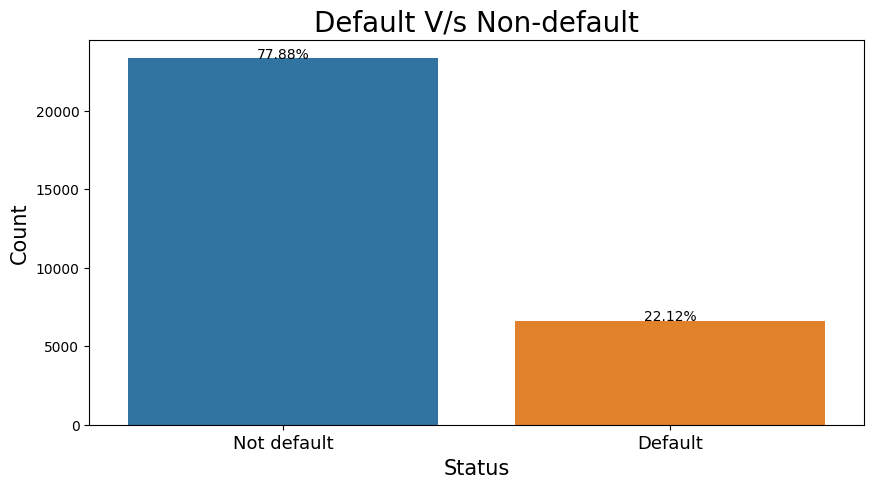

In [ ]:
# Handling imbalanced dataset(if needed)
plt.figure(figsize =(10,5))
ax = sns.countplot(data = Cr_df, x = Cr_df['default'])

ax.set_title('Default V/s Non-default', fontsize = 20)
ax.set_xlabel('Status', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_xticklabels(['Not default', 'Default'], fontsize = 13)

# Adding percentage to the top of each bar
total = float(len(Cr_df))
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          '{:1.2f}'.format(height/total *100) + '%',
          ha = 'center')

In [ ]:
# Using Smote for handling data imbalance

from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()
X_sm, Y_sm = SMOTE.fit_resample(X,Y)

# summarize the new class distribution
Y_sm.value_counts()

1    23364
0    23364
Name: default, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. In our case there is a huge difference in classes which is why class needs to be balanced. SMOTE (Synthetic Minority Oversampling Technique) is an oversampling technique used to overcome the imbalanced dataset problems. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

### 6. Data Scaling

In [ ]:
# Scaling Data
scaler = StandardScaler()
x_std = scaler.fit_transform(X_sm)

x_std

array([[-1.06320577, -1.29072239,  1.80705119, ...,  1.28132394,
        -0.88021194, -0.09102671],
       [-0.2696009 , -1.0638684 , -0.71595251, ..., -0.78044276,
         1.13609002, -0.09102671],
       [-0.50768236, -0.15645245, -0.71595251, ..., -0.78044276,
         1.13609002, -0.09102671],
       ...,
       [-0.74576382, -1.29072239,  0.12504872, ..., -0.78044276,
        -0.88021194, -0.09102671],
       [ 1.63505081,  0.7509635 , -0.71595251, ...,  1.28132394,
        -0.88021194, -0.09102671],
       [-0.98384529,  0.41068252, -0.71595251, ..., -0.78044276,
        -0.88021194, -0.09102671]])

##### Which method have you used to scale you data and why?

Standard scaling is used here so that the magnitude is normalised. It will also help machine learning model to function more accurately.

### Train-Test Split

In [ ]:
# Train-Test Split for splitting the dataset into training and validation sets
x_train,x_test,y_train,y_test = train_test_split(x_std,Y_sm,test_size=0.2)

## ***7. ML Model Implementation***

Since data was balanced after

In [ ]:
# Training Logistic Regression model
logistic = LogisticRegression(max_iter=200,random_state=42)
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [ ]:
# Predicting using our trained Logistic regression model
y_pred = logistic.predict(x_test)

<Axes: >

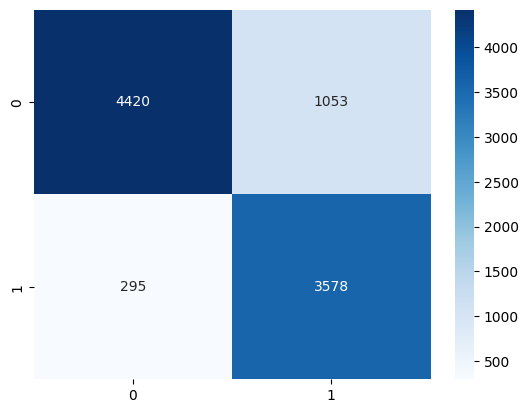

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
log_prec=precision_score(y_pred,y_test)
log_rec=recall_score(y_pred,y_test)
log_acc=accuracy_score(y_pred,y_test)
log_f1=f1_score(y_pred,y_test)
log_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mLogistic Regression Classifier Model Metrics:\033[0m')
print(f"Precision Score: {log_prec}\nRecall Score: {log_rec}\nAccuracy Score: {log_acc}\nF1 Score: {log_f1}\nAUC-ROC score: {log_roc}")

Logistic Regression Classifier Model Metrics:
Precision Score: 0.772619304685813
Recall Score: 0.9238316550477665
Accuracy Score: 0.8557671731221913
F1 Score: 0.8414863593603009
AUC-ROC score: 0.8657163025832657


## Decision Tree Classifier

In [ ]:
# Training Decision Tree Classifier Model
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predicting using our trained Decision Tree Classifier model
y_pred = clf_tree.predict(x_test)

<Axes: >

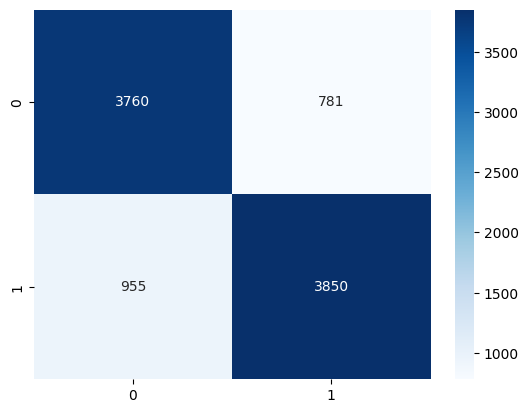

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

In [ ]:
# Checking classification matrices
dtc_prec = precision_score(y_pred, y_pred)
dtc_rec = recall_score(y_pred, y_test)
dtc_acc = accuracy_score(y_pred, y_test)
dtc_f1 = f1_score(y_pred, y_test)
dtc_roc = roc_auc_score(y_pred, y_test)

# Printing the classification metrices
print('\033[1mDecision Tree Classifier model metrices:\033[0m')
print(f"Precision Score: {dtc_prec}\nRecall Score: {dtc_rec}\nAccuracy Score: {dtc_acc}\nf1 Score: {dtc_f1}\nAUC-ROC Score: {dtc_roc}")

Decision Tree Classifier model metrices:
Precision Score: 1.0
Recall Score: 0.8012486992715921
Accuracy Score: 0.814252086454098
f1 Score: 0.8160237388724036
AUC-ROC Score: 0.8146300752468949


## Random Forest Classifier

In [ ]:
 # Training Random Forest Classifier
 forest = RandomForestClassifier(random_state = 42)
 forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicitng using our trained Random Forest Classifier model
y_pred = forest.predict(x_test)

<Axes: >

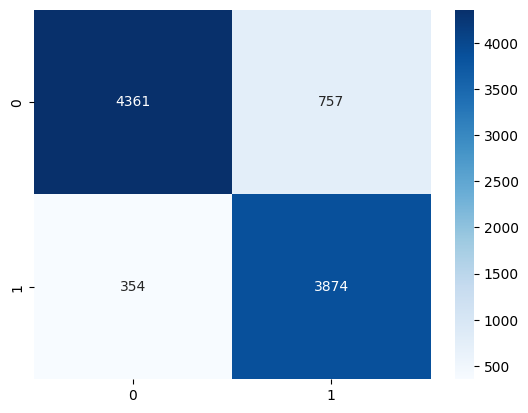

In [ ]:
# Creating Confusion matrix to check TP, FP, FN, TN
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")

In [ ]:
# Checking the classification metrics
rfc_prec=precision_score(y_pred,y_test)
rfc_rec=recall_score(y_pred,y_test)
rfc_acc=accuracy_score(y_pred,y_test)
rfc_f1=f1_score(y_pred,y_test)
rfc_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mRandom Forest Classifier Metrics:\033[0m')
print(f"Precision Score: {rfc_prec}\nRecall Score: {rfc_rec}\nAccuracy Score: {rfc_acc}\nF1 Score: {rfc_f1}\nAUC-ROC score: {rfc_roc}")

Random Forest Classifier Metrics:
Precision Score: 0.836536385229972
Recall Score: 0.9162724692526018
Accuracy Score: 0.8811256152364648
F1 Score: 0.8745908116040185
AUC-ROC score: 0.884181564833413


## XGBoost

In [ ]:
# Taining XG Boost Classifier
xgb_clf = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.3, n_jobs = -1, random_state = 42)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# Predicting using XGBoost Classifier
y_pred = xgb_clf.predict(x_test)

<Axes: >

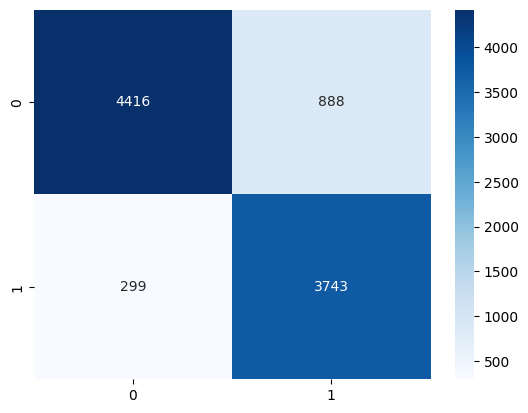

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
xgb_prec=precision_score(y_pred,y_test)
xgb_rec=recall_score(y_pred,y_test)
xgb_acc=accuracy_score(y_pred,y_test)
xgb_f1=f1_score(y_pred,y_test)
xgb_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mXGboost Model Metrics:\033[0m')
print(f"Precision Score: {xgb_prec}\nRecall Score: {xgb_rec}\nAccuracy Score: {xgb_acc}\nF1 Score: {xgb_f1}\nAUC-ROC score: {xgb_roc}")

XGboost Model Metrics:
Precision Score: 0.8082487583675232
Recall Score: 0.9260267194458189
Accuracy Score: 0.872993794136529
F1 Score: 0.8631384757292748
AUC-ROC score: 0.8793029524830905


## Support Vector Classifier

In [ ]:
# Training Support Vector Classifier model
svc = SVC(random_state = 42)
svc.fit(x_train, y_train)

SVC(random_state=42)

In [ ]:
# Predicting using our trained SVC model
y_pred = svc.predict(x_test)

<Axes: >

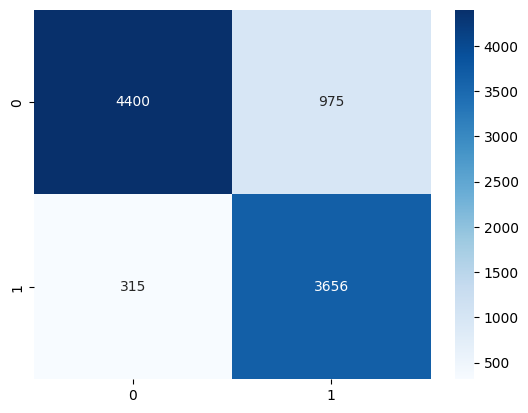

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
svc_prec=precision_score(y_pred,y_test)
svc_rec=recall_score(y_pred,y_test)
svc_acc=accuracy_score(y_pred,y_test)
svc_f1=f1_score(y_pred,y_test)
svc_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mSupport Vector Classifier Model Metrics:\033[0m')
print(f"Precision Score: {svc_prec}\nRecall Score: {svc_rec}\nAccuracy Score: {svc_acc}\nF1 Score: {svc_f1}\nAUC-ROC score: {svc_roc}")

Support Vector Classifier Model Metrics:
Precision Score: 0.7894623191535306
Recall Score: 0.9206748929740619
Accuracy Score: 0.8619730365931949
F1 Score: 0.8500348756103232
AUC-ROC score: 0.8696397720684262


# Cross-Validation and HyperParameter Tuning

## Logistic Regression

In [ ]:
# Initializing paramter grid for GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet','none'],'C':list(np.linspace(0,1,11)),'max_iter':list(range(50,500,50))}

# Defining object for GridSearchCV
logistic_GCV = LogisticRegression(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
logistic_GCV=GridSearchCV(logistic_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
logistic_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0],
                         'max_iter': [50, 100, 150, 200, 250, 300, 350, 400,
                                      450],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = logistic_GCV.predict(x_test)

<Axes: >

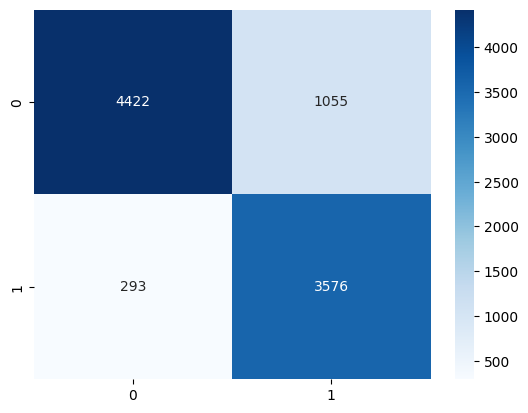

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Printing the metrics for GridSearchCV
log_prec_gcv=precision_score(y_pred,y_test)
log_rec_gcv=recall_score(y_pred,y_test)
log_acc_gcv=accuracy_score(y_pred,y_test)
log_f1_gcv=f1_score(y_pred,y_test)
log_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Logistic Regression according to GCV:\033[0m',logistic_GCV.best_params_)
print('\033[1mTuned Logistic Regression Model Metrics:\033[0m')
print(f"Precision Score: {log_prec_gcv}\nRecall Score: {log_rec_gcv}\nAccuracy Score: {log_acc_gcv}\nF1 Score: {log_f1_gcv}\nAUC-ROC score: {log_roc_gcv}")

Best Parameters for Logistic Regression according to GCV: {'C': 0.1, 'max_iter': 50, 'penalty': 'none'}
Tuned Logistic Regression Model Metrics:
Precision Score: 0.7721874325199741
Recall Score: 0.9242698371672267
Accuracy Score: 0.8557671731221913
F1 Score: 0.8414117647058824
AUC-ROC score: 0.8658230690309385


## Decision Tree Classifier

In [ ]:
# Initializing paramter grid for GridSearchCV
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}

# Defining object for GridSearchCV
dtc_GCV = DecisionTreeClassifier(random_state=42)

# Using GridSearchCV with scoring parameter as precision score
dtc_GCV=GridSearchCV(dtc_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
dtc_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = dtc_GCV.predict(x_test)

<Axes: >

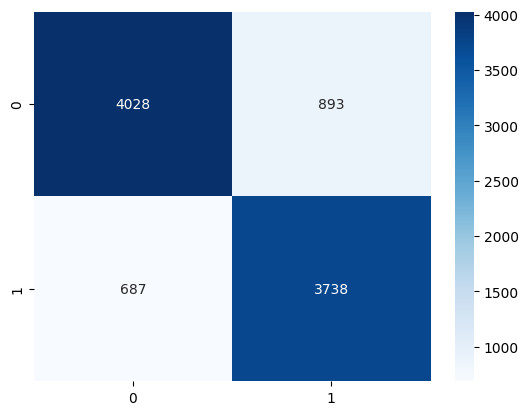

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
dtc_prec_gcv=precision_score(y_pred,y_test)
dtc_rec_gcv=recall_score(y_pred,y_test)
dtc_acc_gcv=accuracy_score(y_pred,y_test)
dtc_f1_gcv=f1_score(y_pred,y_test)
dtc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Decision Tree Classifier according to GCV:\033[0m',dtc_GCV.best_params_)
print('\033[1mDecision Tree Classifier Model Metrics:\033[0m')
print(f"Precision Score: {dtc_prec_gcv}\nRecall Score: {dtc_rec_gcv}\nAccuracy Score: {dtc_acc_gcv}\nF1 Score: {dtc_f1_gcv}\nAUC-ROC score: {dtc_roc_gcv}")

Best Parameters for Decision Tree Classifier according to GCV: {'min_samples_leaf': 8, 'min_samples_split': 2}
Decision Tree Classifier Model Metrics:
Precision Score: 0.8071690779529259
Recall Score: 0.8447457627118644
Accuracy Score: 0.8309437192381768
F1 Score: 0.825530035335689
AUC-ROC score: 0.8316392906223414


## Random Forest Classifier

In [ ]:
# Initializing paramter grid for RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = list(range(5,15))
# Maximum number of levels in tree
max_depth = list(range(2,15))
# Minimum number of samples required to split a node
min_samples_split = range(1,10)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,10)
# Create the random grid
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(parameters)

# Defining object for RandomizedSearchCV
rfc_RCV = RandomForestClassifier(random_state=42, criterion = 'gini', class_weight = 'balanced')

# Using RandomizedSearchCV that optimizes scoring parameter precision score
rfc_RCV=RandomizedSearchCV(estimator = rfc_RCV, param_distributions = parameters, cv = 5, n_jobs=-1, scoring='precision',verbose=10)

# Fitting data to our RandomizedSearchCV object
rfc_RCV.fit(x_train,y_train)

{'n_estimators': [10, 32, 55, 77, 100], 'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': range(1, 10), 'min_samples_leaf': range(1, 10)}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'max_features': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 14],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': [10, 32, 55, 77, 100]},
                   scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = rfc_RCV.predict(x_test)

<Axes: >

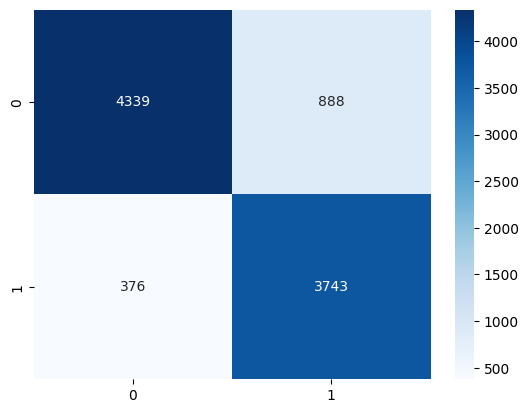

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
rfc_prec_gcv=precision_score(y_pred,y_test)
rfc_rec_gcv=recall_score(y_pred,y_test)
rfc_acc_gcv=accuracy_score(y_pred,y_test)
rfc_f1_gcv=f1_score(y_pred,y_test)
rfc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Decision Tree Classifier according to RCV:\033[0m',dtc_GCV.best_params_)
print('\033[1mRandom Forest Classifier Model Metrics:\033[0m')
print(f"Precision Score: {rfc_prec_gcv}\nRecall Score: {rfc_rec_gcv}\nAccuracy Score: {rfc_acc_gcv}\nF1 Score: {rfc_f1_gcv}\nAUC-ROC score: {rfc_roc_gcv}")

Best Parameters for Decision Tree Classifier according to RCV: {'min_samples_leaf': 8, 'min_samples_split': 2}
Random Forest Classifier Model Metrics:
Precision Score: 0.8071690779529259
Recall Score: 0.9310087173100872
Accuracy Score: 0.8748127541194094
F1 Score: 0.8646773074253989
AUC-ROC score: 0.8817489656706129


## XGBoost

In [ ]:
# Initializing paramter grid for GridSearchCV
parameters = {'learning_rate':list(np.linspace(0,1,11))}

# Defining object for GridSearchCV
xgb_GCV = xgb.XGBClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
xgb_GCV=GridSearchCV(xgb_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
xgb_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0, 0.1, 0.2, 0.30000000000000004,
                                           0.4, 0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0]},
             scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = xgb_GCV.predict(x_test)

<Axes: >

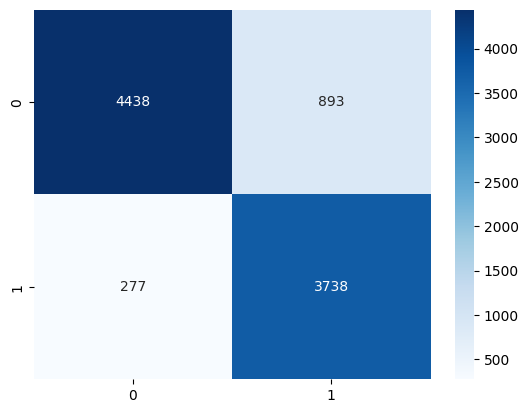

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
xgb_prec_gcv=precision_score(y_pred,y_test)
xgb_rec_gcv=recall_score(y_pred,y_test)
xgb_acc_gcv=accuracy_score(y_pred,y_test)
xgb_f1_gcv=f1_score(y_pred,y_test)
xgb_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for XGBoost Classifier according to GCV:\033[0m',xgb_GCV.best_params_)
print('\033[1mXGBoost Classifier Model Metrics:\033[0m')
print(f"Precision Score: {xgb_prec_gcv}\nRecall Score: {xgb_rec_gcv}\nAccuracy Score: {xgb_acc_gcv}\nF1 Score: {xgb_f1_gcv}\nAUC-ROC score: {xgb_roc_gcv}")

Best Parameters for XGBoost Classifier according to GCV: {'learning_rate': 0.1}
XGBoost Classifier Model Metrics:
Precision Score: 0.8071690779529259
Recall Score: 0.9310087173100872
Accuracy Score: 0.8748127541194094
F1 Score: 0.8646773074253989
AUC-ROC score: 0.8817489656706129


## Support Vector Classifier

In [ ]:
# Initializing paramter grid for RandomizedSearchCV
parameters = {'C':list(np.linspace(0,1,10))}

# Defining object for RandomizedSearchCV
SVC_RCV = SVC(random_state=42)

# Using RandomizedSearchCV that optimizes scoring parameter precision score
SVC_RCV=RandomizedSearchCV(SVC_RCV, param_distributions = parameters, cv = 5, n_iter = 10, n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
SVC_RCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.0, 0.1111111111111111,
                                              0.2222222222222222,
                                              0.3333333333333333,
                                              0.4444444444444444,
                                              0.5555555555555556,
                                              0.6666666666666666,
                                              0.7777777777777777,
                                              0.8888888888888888, 1.0]},
                   scoring='precision', verbose=10)

In [ ]:
# Predicting Using RandomizedSearchCV
y_pred = SVC_RCV.predict(x_test)

<Axes: >

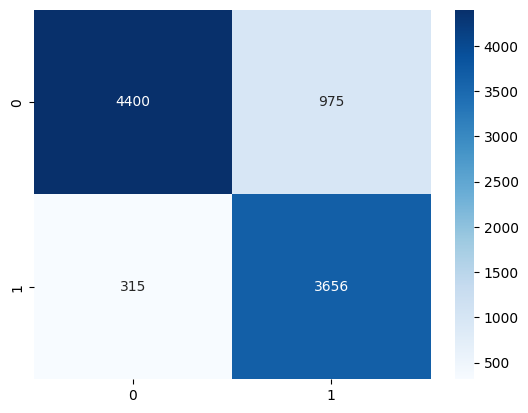

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
svc_prec_gcv=precision_score(y_pred,y_test)
svc_rec_gcv=recall_score(y_pred,y_test)
svc_acc_gcv=accuracy_score(y_pred,y_test)
svc_f1_gcv=f1_score(y_pred,y_test)
svc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Support Vector Classifier according to GCV:\033[0m',SVC_RCV.best_params_)
print('\033[1mSupport Vector Classifier Model Metrics:\033[0m')
print(f"Precision Score: {svc_prec_gcv}\nRecall Score: {svc_rec_gcv}\nAccuracy Score: {svc_acc_gcv}\nF1 Score: {svc_f1_gcv}\nAUC-ROC score: {svc_roc_gcv}")

Best Parameters for Support Vector Classifier according to GCV: {'C': 1.0}
Support Vector Classifier Model Metrics:
Precision Score: 0.7894623191535306
Recall Score: 0.9206748929740619
Accuracy Score: 0.8619730365931949
F1 Score: 0.8500348756103232
AUC-ROC score: 0.8696397720684262


# Plotting Classification Metrics

In [ ]:
# Creating Lists for Un-tuned Models for Plotting

precision,recall,accuracy,f1,roc=[],[],[],[],[]
precision.extend([log_prec,svc_prec,dtc_prec,rfc_prec,xgb_prec])
recall.extend([log_rec,svc_rec,dtc_rec,rfc_rec,xgb_rec])
accuracy.extend([log_acc,svc_acc,dtc_acc,rfc_acc,xgb_acc])
f1.extend([log_f1,svc_f1,dtc_f1,rfc_f1,xgb_f1])
roc.extend([log_roc,svc_roc,dtc_roc,rfc_roc,xgb_roc])
precision=[int(i*100) for i in precision]
recall=[int(i*100) for i in recall]
accuracy=[int(i*100) for i in accuracy]
f1=[int(i*100) for i in f1]
roc=[int(i*100) for i in roc]

In [ ]:
# Creating Lists for Tuned Models for Plotting
precision_gcv,recall_gcv,accuracy_gcv,f1_gcv,roc_gcv=[],[],[],[],[]
precision_gcv.extend([log_prec_gcv,svc_prec_gcv,dtc_prec_gcv,rfc_prec_gcv,xgb_prec_gcv])
recall_gcv.extend([log_rec_gcv,svc_rec_gcv,dtc_rec_gcv,rfc_rec_gcv,xgb_rec_gcv])
accuracy_gcv.extend([log_acc_gcv,svc_acc_gcv,dtc_acc_gcv,rfc_acc_gcv,xgb_acc_gcv])
f1_gcv.extend([log_f1_gcv,svc_f1_gcv,dtc_f1_gcv,rfc_f1_gcv,xgb_f1_gcv])
roc_gcv.extend([log_roc_gcv,svc_roc_gcv,dtc_roc_gcv,rfc_roc_gcv,xgb_roc_gcv])
precision_gcv=[int(i*100) for i in precision_gcv]
recall_gcv=[int(i*100) for i in recall_gcv]
accuracy_gcv=[int(i*100) for i in accuracy_gcv]
f1_gcv=[int(i*100) for i in f1_gcv]
roc_gcv=[int(i*100) for i in roc_gcv]

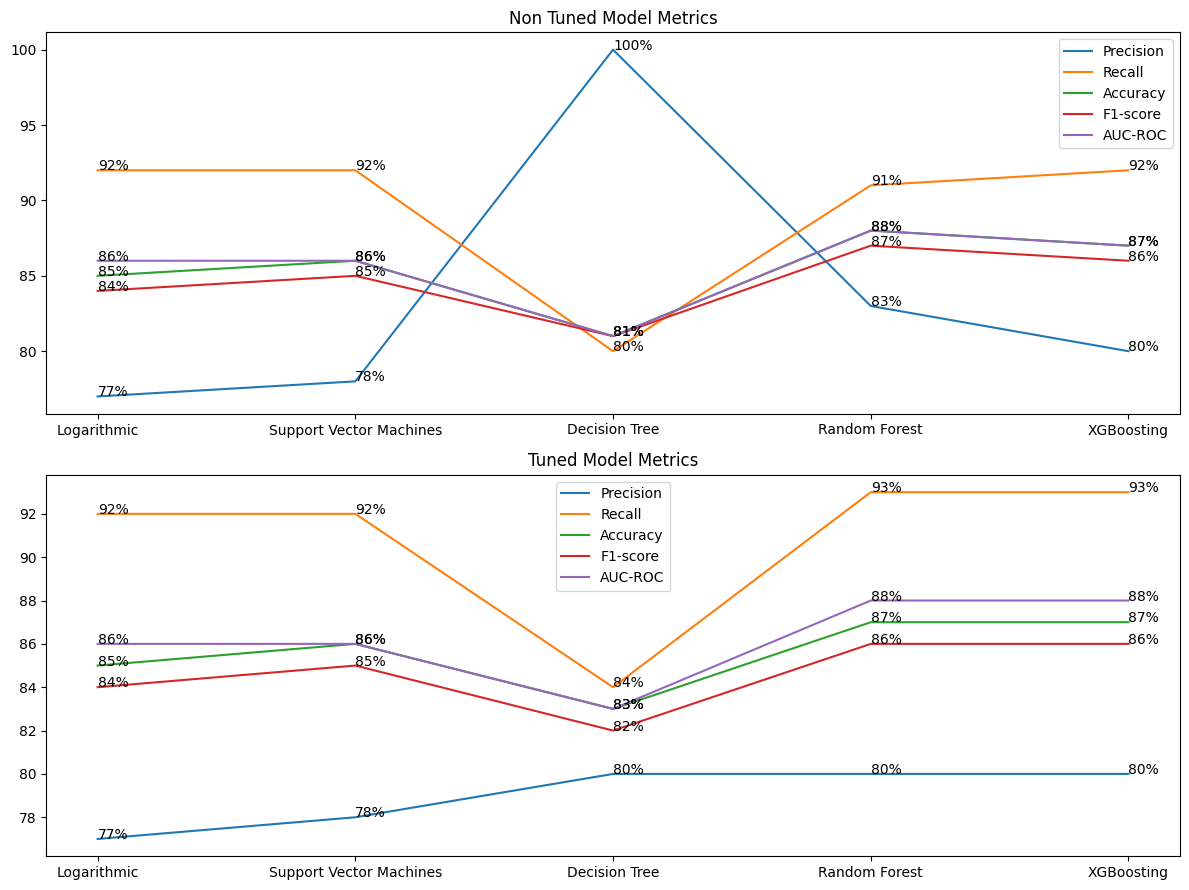

In [ ]:
# Plotting the data from Above Executions
x=['Logarithmic','Support Vector Machines','Decision Tree','Random Forest','XGBoosting']
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
for i in [precision,recall,accuracy,f1,roc]:
    plt.plot(x,i)
    for a,b in zip(x,i):
        plt.text(a,b,str(b)+'%')
plt.legend(['Precision','Recall','Accuracy','F1-score','AUC-ROC'])
plt.title('Non Tuned Model Metrics')

plt.subplot(2,1,2)
for i in [precision_gcv,recall_gcv,accuracy_gcv,f1_gcv,roc_gcv]:
    plt.plot(x,i)
    for a,b in zip(x,i):
        plt.text(a,b,str(b)+'%')
plt.legend(['Precision','Recall','Accuracy','F1-score','AUC-ROC'])
plt.title('Tuned Model Metrics')
plt.tight_layout()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have taken some of the popular metrics into consideration for my evaluation. Although I feel f1 and AUC-ROC scores will give a better insight since f1 score uses precision and recall into consideration and AUC-ROC score is used to define the model's performance at distinguishing between the positive and negative classes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* Judging from the Score it can be said that I would either consider Random Forest or XGBoost since they are performing slightly better than every other model in most of the cases.

# **Conclusion**

**Exploratory Data Analysis**
* From the EDA it was seen that from among the two genders, gender 2 had a habbit of taking credit more frequently.
* From among other categorical columns, education category 2 and mariage status 2 had a habbit of taking credit more frequently.
* Bill from April to September had correlation which can be explained since they are bills, there was no other multicolinearity in the data.


**Machine Learning**
* In machine Learning modeling part and pre-proccessing for it part high class imbalance was was seen and was treated accordingly using SMOTE technique.
* A total of 5 Classification machine learning models were used, those were Logistic Regression, Decision Tree, Random Forest, XGBoost and Support Vector Classifier.
* From the 5 classifiers used Random Forest and XG Boost performed better than all other classifiers in most of the cases with an f1 score of 86-87 % and AUC-ROC score of 87-88 %.